# TIME SERIES MODELING

### Objectives:

*   Select the subset of the dataset
*   Perform exploratory data analysis and create visualizations.
*   Forecast real estate prices of various zipcodes using data from [Zillow](https://www.zillow.com/research/data/).
*   Determine "What are the top 5 best zipcodes for a real estate investment firm to invest in?"
*   What are the metrics of top 5 zipcodes?







## IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid') 
font = {'weight' : 'bold', 'size'   : 23}
matplotlib.rc('font', **font)
plt.style.use('seaborn')

pd.set_option('display.max_columns',0)

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import metrics
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
# !pip3 install --upgrade statsmodels

# !pip3 install --user scipy==1.4.1

In [3]:
!pip install pmdarima
import pmdarima
from pmdarima.arima import auto_arima

In [4]:
df = pd.read_csv('/content/zillow_data.csv')

In [5]:
df.head()

RegionID  RegionName      City State  ...  2018-01  2018-02  2018-03  2018-04
0     84654       60657   Chicago    IL  ...  1024400  1030700  1033800  1030600
1     90668       75070  McKinney    TX  ...   318100   319600   321100   321800
2     91982       77494      Katy    TX  ...   321200   323000   326900   329900
3     84616       60614   Chicago    IL  ...  1302700  1306400  1308500  1307000
4     93144       79936   El Paso    TX  ...   120300   120500   121000   121500

[5 rows x 272 columns]

In [6]:
df.dtypes[:10]

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [8]:
df.describe()

RegionID    RegionName  ...       2018-03       2018-04
count   14723.000000  14723.000000  ...  1.472300e+04  1.472300e+04
mean    81075.010052  48222.348706  ...  2.865114e+05  2.880399e+05
std     31934.118525  29359.325439  ...  3.724612e+05  3.720544e+05
min     58196.000000   1001.000000  ...  1.380000e+04  1.380000e+04
25%     67174.500000  22101.500000  ...  1.319500e+05  1.324000e+05
50%     78007.000000  46106.000000  ...  1.967000e+05  1.981000e+05
75%     90920.500000  75205.500000  ...  3.188500e+05  3.211000e+05
max    753844.000000  99901.000000  ...  1.833770e+07  1.789490e+07

[8 rows x 268 columns]

## EXPLORATORY DATA ANALYSIS

### Objectives

Let's try to find answers to the question below for our exploratory data analysis.

*   Data distribution by ***State*** column
*   Create a subset data frame for Austin, TX
*   Property value trends by zipcodes
*   Value change in each zipcode between 1996-2018 and 2012-2018

In [11]:
df.head()

RegionID  RegionName      City State  ...  2018-01  2018-02  2018-03  2018-04
0     84654       60657   Chicago    IL  ...  1024400  1030700  1033800  1030600
1     90668       75070  McKinney    TX  ...   318100   319600   321100   321800
2     91982       77494      Katy    TX  ...   321200   323000   326900   329900
3     84616       60614   Chicago    IL  ...  1302700  1306400  1308500  1307000
4     93144       79936   El Paso    TX  ...   120300   120500   121000   121500

[5 rows x 272 columns]

In [12]:
df.describe()

RegionID    RegionName  ...       2018-03       2018-04
count   14723.000000  14723.000000  ...  1.472300e+04  1.472300e+04
mean    81075.010052  48222.348706  ...  2.865114e+05  2.880399e+05
std     31934.118525  29359.325439  ...  3.724612e+05  3.720544e+05
min     58196.000000   1001.000000  ...  1.380000e+04  1.380000e+04
25%     67174.500000  22101.500000  ...  1.319500e+05  1.324000e+05
50%     78007.000000  46106.000000  ...  1.967000e+05  1.981000e+05
75%     90920.500000  75205.500000  ...  3.188500e+05  3.211000e+05
max    753844.000000  99901.000000  ...  1.833770e+07  1.789490e+07

[8 rows x 268 columns]

#### *Data Distribution by State*

In [13]:
df.groupby('State').count()

RegionID  RegionName  City  Metro  ...  2018-01  2018-02  2018-03  2018-04
State                                     ...                                    
AK           28          28    28     22  ...       28       28       28       28
AL          183         183   183    175  ...      183      183      183      183
AR          105         105   105    100  ...      105      105      105      105
AZ          230         230   230    228  ...      230      230      230      230
CA         1224        1224  1224   1182  ...     1224     1224     1224     1224
CO          249         249   249    229  ...      249      249      249      249
CT          124         124   124    124  ...      124      124      124      124
DC           18          18    18     18  ...       18       18       18       18
DE           41          41    41     41  ...       41       41       41       41
FL          785         785   785    758  ...      785      785      785      785
GA          345         345   345    317  ...      345      345      345      345
HI           62          62    62     62  ...       62       62       62       62
IA          158         158   158    156  ...      158      158      158      158
ID          110         110   110     87  ...      110      110      110      110
IL          547         547   547    537  ...      547      547      547      547
IN          428         428   428    363  ...      428      428      428      428
KS          241         241   241    184  ...      241      241      241      241
KY          139         139   139    132  ...      139      139      139      139
LA          193         193   193    173  ...      193      193      193      193
MA          417         417   417    416  ...      417      417      417      417
MD          317         317   317    300  ...      317      317      317      317
ME           86          86    86     85  ...       86       86       86       86
MI          499         499   499    457  ...      499      499      499      499
MN          375         375   375    339  ...      375      375      375      375
MO          319         319   319    269  ...      319      319      319      319
MS          153         153   153     98  ...      153      153      153      153
MT           71          71    71     43  ...       71       71       71       71
NC          428         428   428    391  ...      428      428      428      428
ND           31          31    31     21  ...       31       31       31       31
NE           83          83    83     78  ...       83       83       83       83
NH          199         199   199    178  ...      199      199      199      199
NJ          502         502   502    502  ...      502      502      502      502
NM           60          60    60     55  ...       60       60       60       60
NV          103         103   103    103  ...      103      103      103      103
NY         1015        1015  1015    963  ...     1015     1015     1015     1015
OH          588         588   588    570  ...      588      588      588      588
OK          221         221   221    200  ...      221      221      221      221
OR          224         224   224    216  ...      224      224      224      224
PA          831         831   831    816  ...      831      831      831      831
RI           59          59    59     59  ...       59       59       59       59
SC          206         206   206    199  ...      206      206      206      206
SD           19          19    19     19  ...       19       19       19       19
TN          404         404   404    336  ...      404      404      404      404
TX          989         989   989    873  ...      989      989      989      989
UT          121         121   121    109  ...      121      121      121      121
VA          401         401   401    365  ...      401      401      401      401
VT           16          16    16     16  ...       16       16       1

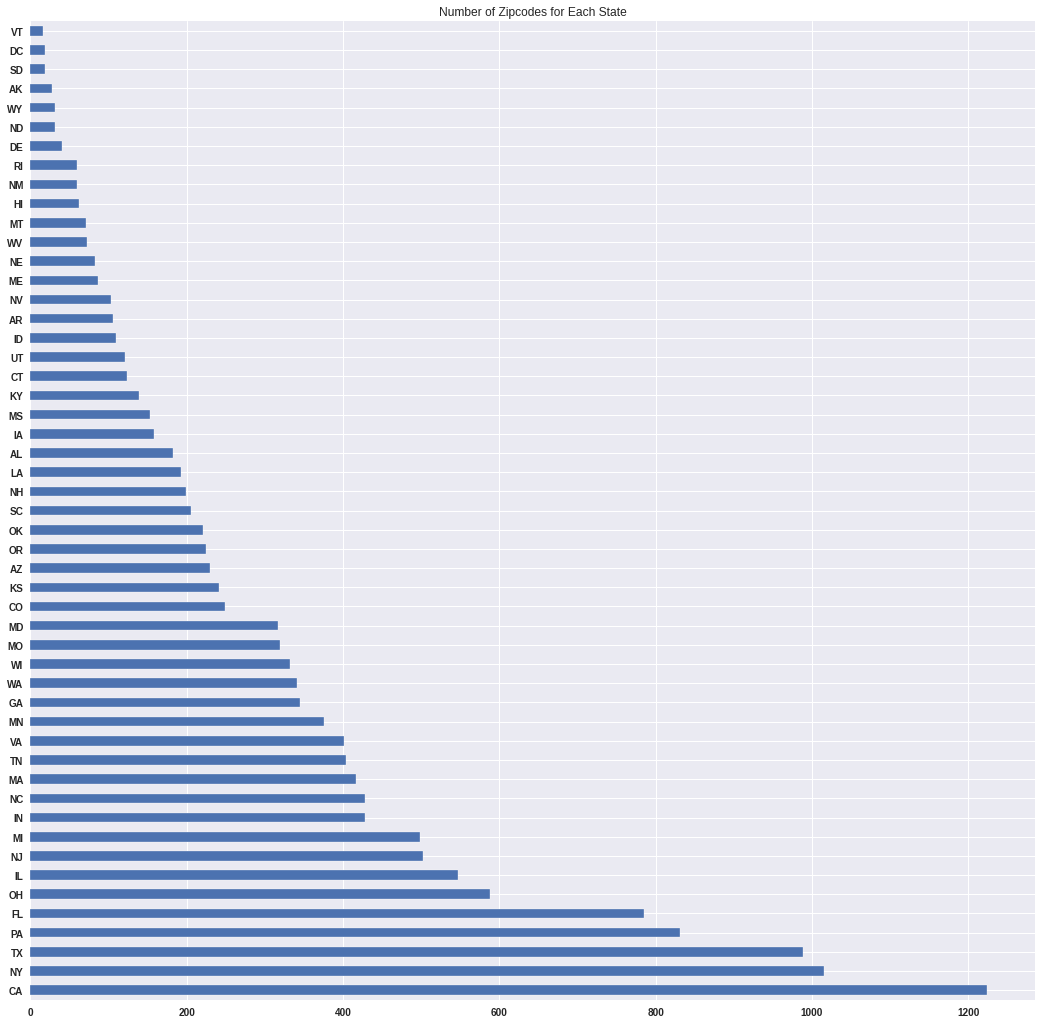

In [14]:
df['State'].value_counts().plot(kind='barh', 
                                figsize=(18,18), 
                                title='Number of Zipcodes for Each State');

We observe from the plot above top 5 states with the most zipcodes:
1. CA
2. NY
3. TX
4. PA
5. FL

Our company is interested in investing in Austin, TEXAS area. We will subset our data set before we start examination with exploratory data analysis.

#### *Austin, TX Dataset*

In [15]:
austin = df[(df['State'] == 'TX') & (df['City'] == 'Austin')]
print('Number of Zipcodes in Austin Dataset:', austin['RegionName'].nunique())
austin

Number of Zipcodes in Austin Dataset: 38


RegionID  RegionName    City State  ... 2018-01 2018-02  2018-03  2018-04
66       92617       78704  Austin    TX  ...  540200  542300   547100   550900
98       92654       78745  Austin    TX  ...  291300  292600   294000   294700
422      92667       78758  Austin    TX  ...  255100  260100   266000   270400
432      92651       78741  Austin    TX  ...  241000  243600   247400   250400
502      92662       78753  Austin    TX  ...  227100  228700   231500   233400
507      92668       78759  Austin    TX  ...  443200  445000   449900   454100
594      92657       78748  Austin    TX  ...  277800  279000   280800   282000
1671     92653       78744  Austin    TX  ...  192100  193200   194500   195500
1936     92658       78749  Austin    TX  ...  349700  352100   355500   357700
2462     92634       78723  Austin    TX  ...  355800  358700   361900   364200
2644     92638       78727  Austin    TX  ...  311800  313400   315200   316500
2649     92628       78717  Austin    TX  ...  356600  359500   362300   363600
2706     92642       78731  Austin    TX  ...  578400  581900   596700   610500
3035     92618       78705  Austin    TX  ...  484300  489100   501200   511600
3371     92616       78703  Austin    TX  ...  875900  880100   884600   885300
3428     92639       78728  Austin    TX  ...  260700  262300   265000   266500
3526     92659       78750  Austin    TX  ...  439100  442400   446100   448200
3581     92655       78746  Austin    TX  ...  912600  917200   921200   918700
3885     92666       78757  Austin    TX  ...  424000  426300   427900   428500
3926     92615       78702  Austin    TX  ...  410100  413800   417300   419800
4969     92660       78751  Austin    TX  ...  436100  437600   441200   444500
5068     92646       78735  Austin    TX  ...  473500  475500   479300   482200
5213     92663       78754  Austin    TX  ...  235100  235700   238300   240600
5307     92661       78752  Austin    TX  ...  300400  301400   302300   303100
6239     92555       78617  Austin    TX  ...  183100  184300   186000   187100
6302     92635       78724  Austin    TX  ...  186400  187900   189100   189300
6533     92656       78747  Austin    TX  ...  244800  246600   249300   251200
6629     92648       78737  Austin    TX  ...  439200  442400   447400   450400
6668     92650       78739  Austin    TX  ...  449500  450400   451300   451000
6704     92637       78726  Austin    TX  ...  437900  438900   441600   444100
6826     92643       78732  Austin    TX  ...  465500  466300   468800   471500
8022     92665       78756  Austin    TX  ...  476600  478700   483400   487400
8350     92632       78721  Austin    TX  ...  296300  297800   297200   296100
8427     92641       78730  Austin    TX  ...  667600  669700   677000   683700
8832     92647       78736  Austin    TX  ...  328400  332600   339900   344900
9323     92644       78733  Austin    TX  ...  583900  593400   607300   615600
9335     92633       78722  Austin    TX  ...  405200  408400   413900   417500
9550     92636       78725  Austin    TX  ...  186000  187000   187700   188200

[38 rows x 272 columns]

In [16]:
# Get data statistics for austin dataset
austin.describe()

RegionID    RegionName  ...        2018-03        2018-04
count     38.000000     38.000000  ...      38.000000      38.000000
mean   92643.394737  78732.289474  ...  401765.789474  404497.368421
std       20.948508     25.080312  ...  172761.272994  173512.355642
min    92555.000000  78617.000000  ...  186000.000000  187100.000000
25%    92635.250000  78724.250000  ...  269700.000000  273300.000000
50%    92646.500000  78735.500000  ...  388100.000000  390850.000000
75%    92657.750000  78748.750000  ...  464425.000000  467150.000000
max    92668.000000  78759.000000  ...  921200.000000  918700.000000

[8 rows x 268 columns]

In [17]:
# Check for null values
print('Number of Null Values in Each Column\n')
for col in austin.columns:
    print(col,' : ', austin[col].isnull().sum())

Number of Null Values in Each Column

RegionID  :  0
RegionName  :  0
City  :  0
State  :  0
Metro  :  0
CountyName  :  0
SizeRank  :  0
1996-04  :  0
1996-05  :  0
1996-06  :  0
1996-07  :  0
1996-08  :  0
1996-09  :  0
1996-10  :  0
1996-11  :  0
1996-12  :  0
1997-01  :  0
1997-02  :  0
1997-03  :  0
1997-04  :  0
1997-05  :  0
1997-06  :  0
1997-07  :  0
1997-08  :  0
1997-09  :  0
1997-10  :  0
1997-11  :  0
1997-12  :  0
1998-01  :  0
1998-02  :  0
1998-03  :  0
1998-04  :  0
1998-05  :  0
1998-06  :  0
1998-07  :  0
1998-08  :  0
1998-09  :  0
1998-10  :  0
1998-11  :  0
1998-12  :  0
1999-01  :  0
1999-02  :  0
1999-03  :  0
1999-04  :  0
1999-05  :  0
1999-06  :  0
1999-07  :  0
1999-08  :  0
1999-09  :  0
1999-10  :  0
1999-11  :  0
1999-12  :  0
2000-01  :  0
2000-02  :  0
2000-03  :  0
2000-04  :  0
2000-05  :  0
2000-06  :  0
2000-07  :  0
2000-08  :  0
2000-09  :  0
2000-10  :  0
2000-11  :  0
2000-12  :  0
2001-01  :  0
2001-02  :  0
2001-03  :  0
2001-04  :  0
2001-05  

In [18]:
for col in austin.columns[:7]:
    print(col, austin[col].nunique())

RegionID 38
RegionName 38
City 1
State 1
Metro 1
CountyName 1
SizeRank 38


***OBSERVATIONS:***

*   This dataset represent information on single family residential property sales between **1996 April** and **2018 April**.
*   There are 14723  different zipcodes included in the dataset.  
*   Texas State has 989 entries.
*   Austin is respresented with 38 zipcodes(out of 77).
*   _austin dataset_ doesn't have any missing values. 
*   **RegionID** is unique to for each zipcode.
*   **SizeRank** is index number starting from 1.
*   austin dataset has the same value for **City, State, Metro, CountyName** as expected. We can assume these columns do not provide any significant information.

#### Property Value Trends by Zipcodes

In [19]:
#Make a copy of austin data frame 
austin_eda = austin.copy()
austin_eda = austin_eda.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)
austin_eda.rename(columns={'RegionName': 'Zipcode'}, inplace=True)
# Convert numberical Zipcode column to string
austin_eda['Zipcode'] = austin_eda['Zipcode'].astype(str)
austin_eda.head()

Zipcode   1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04
66    78704  221300.0  221100.0  221000.0  ...   540200   542300   547100   550900
98    78745  135000.0  134200.0  133800.0  ...   291300   292600   294000   294700
422   78758  129000.0  128300.0  127500.0  ...   255100   260100   266000   270400
432   78741   93800.0   93600.0   93500.0  ...   241000   243600   247400   250400
502   78753  111300.0  110600.0  109900.0  ...   227100   228700   231500   233400

[5 rows x 266 columns]

In [20]:
# Reset dataframe index and drop old index related to original zillow dataset
austin_eda = austin_eda.reset_index(drop=True)
austin_eda.head()

Zipcode   1996-04   1996-05   1996-06  ...  2018-01  2018-02  2018-03  2018-04
0   78704  221300.0  221100.0  221000.0  ...   540200   542300   547100   550900
1   78745  135000.0  134200.0  133800.0  ...   291300   292600   294000   294700
2   78758  129000.0  128300.0  127500.0  ...   255100   260100   266000   270400
3   78741   93800.0   93600.0   93500.0  ...   241000   243600   247400   250400
4   78753  111300.0  110600.0  109900.0  ...   227100   228700   231500   233400

[5 rows x 266 columns]

In [21]:
austin_eda = austin_eda.transpose()
austin_eda.head()

0       1       2      3   ...      34      35     36      37
Zipcode   78704   78745   78758  78741  ...   78736   78733  78722   78725
1996-04  221300  135000  129000  93800  ...  181100  397000  76200  106000
1996-05  221100  134200  128300  93600  ...  181500  396300  76400  105600
1996-06  221000  133800  127500  93500  ...  182000  395600  76500  105300
1996-07  221000  133800  126900  93400  ...  182500  394900  76700  105000

[5 rows x 38 columns]

In [22]:
# Renaming all columns to reflect the 36 zipcodes from austin dataset

new_header = austin_eda.iloc[0] # Grab all first row data for the column headers
austin_eda = austin_eda[1:] # Take all rows after first row
austin_eda.columns = new_header # Assign all column headers to be equal to row 0 data
austin_eda.head()

Zipcode   78704   78745   78758  78741  ...   78736   78733  78722   78725
1996-04  221300  135000  129000  93800  ...  181100  397000  76200  106000
1996-05  221100  134200  128300  93600  ...  181500  396300  76400  105600
1996-06  221000  133800  127500  93500  ...  182000  395600  76500  105300
1996-07  221000  133800  126900  93400  ...  182500  394900  76700  105000
1996-08  221300  134000  126300  93400  ...  182900  394500  77000  104800

[5 rows x 38 columns]

In [23]:
# Convert index to datetime
austin_eda.index = pd.to_datetime(austin_eda.index)
austin_eda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   78704   265 non-null    object
 1   78745   265 non-null    object
 2   78758   265 non-null    object
 3   78741   265 non-null    object
 4   78753   265 non-null    object
 5   78759   265 non-null    object
 6   78748   265 non-null    object
 7   78744   265 non-null    object
 8   78749   265 non-null    object
 9   78723   265 non-null    object
 10  78727   265 non-null    object
 11  78717   265 non-null    object
 12  78731   265 non-null    object
 13  78705   265 non-null    object
 14  78703   265 non-null    object
 15  78728   265 non-null    object
 16  78750   265 non-null    object
 17  78746   265 non-null    object
 18  78757   265 non-null    object
 19  78702   265 non-null    object
 20  78751   265 non-null    object
 21  78735   265 non-null    object
 22  78754  

In [24]:
austin_eda.describe()

Zipcode     78704     78745     78758  ...     78733     78722     78725
count       265.0     265.0     265.0  ...     265.0     265.0     265.0
unique      248.0     224.0     186.0  ...     236.0     246.0     188.0
top      221000.0  151300.0  143400.0  ...  403500.0  223500.0  104400.0
freq          2.0       3.0       6.0  ...       4.0       2.0       5.0

[4 rows x 38 columns]

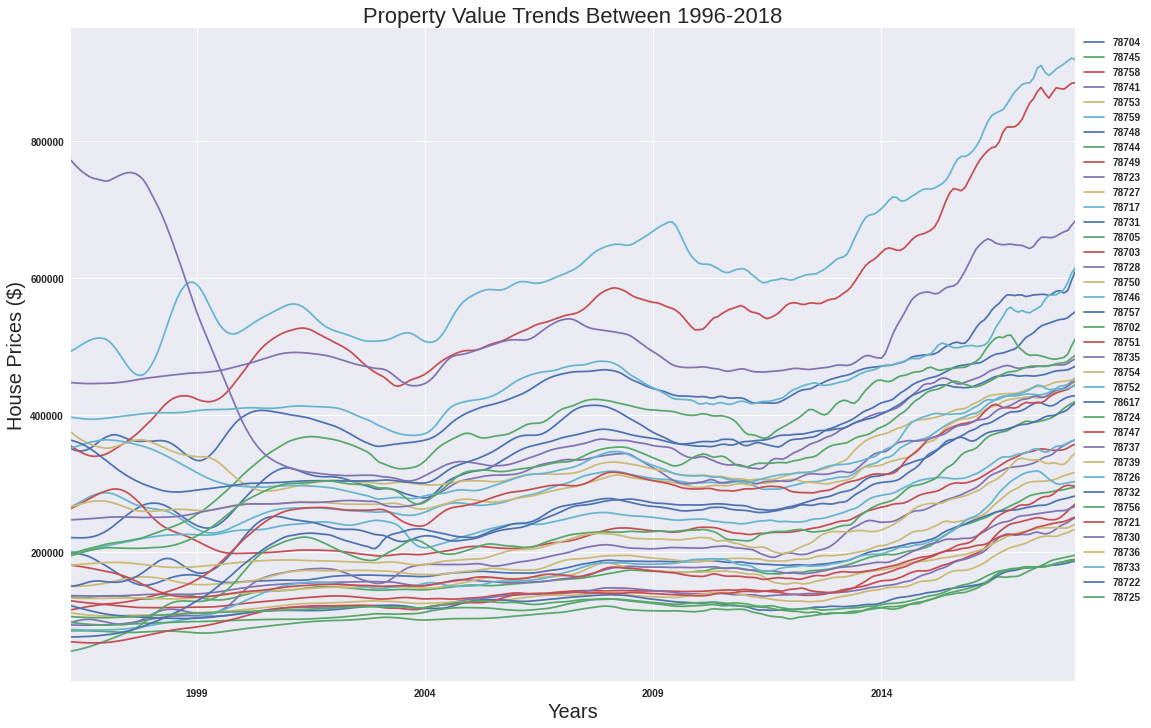

In [25]:
# Plotting Trends for Each ZipCode

austin_eda.plot(figsize=(18,12))
plt.title('Property Value Trends Between 1996-2018', fontsize=22)
plt.xlabel('Years', fontsize=20)
plt.ylabel('House Prices ($)', fontsize=20)
plt.legend(bbox_to_anchor=[1,1])
plt.show();

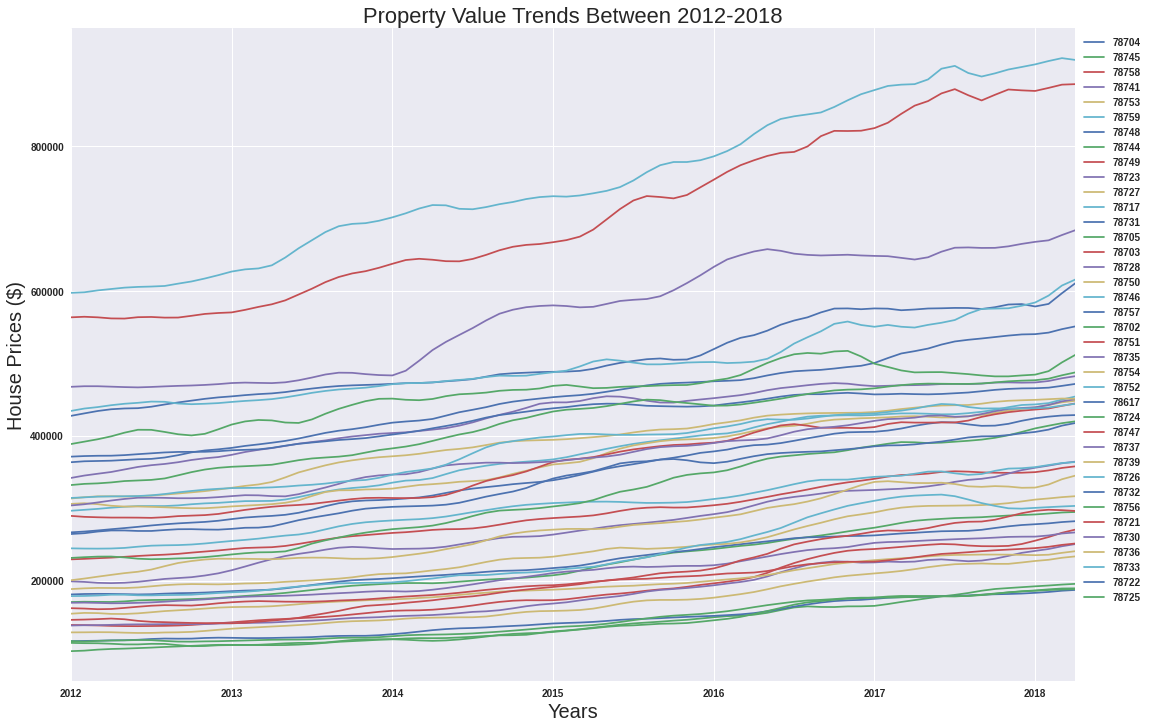

In [28]:
# Plotting Trends for Each ZipCode between 2012 and 2018

austin_eda['2012':].plot(figsize=(18,12))
plt.title('Property Value Trends Between 2012-2018', fontsize=22)
plt.xlabel('Years', fontsize=20)
plt.ylabel('House Prices ($)', fontsize=20)
plt.legend(bbox_to_anchor=[1,1])
plt.show();

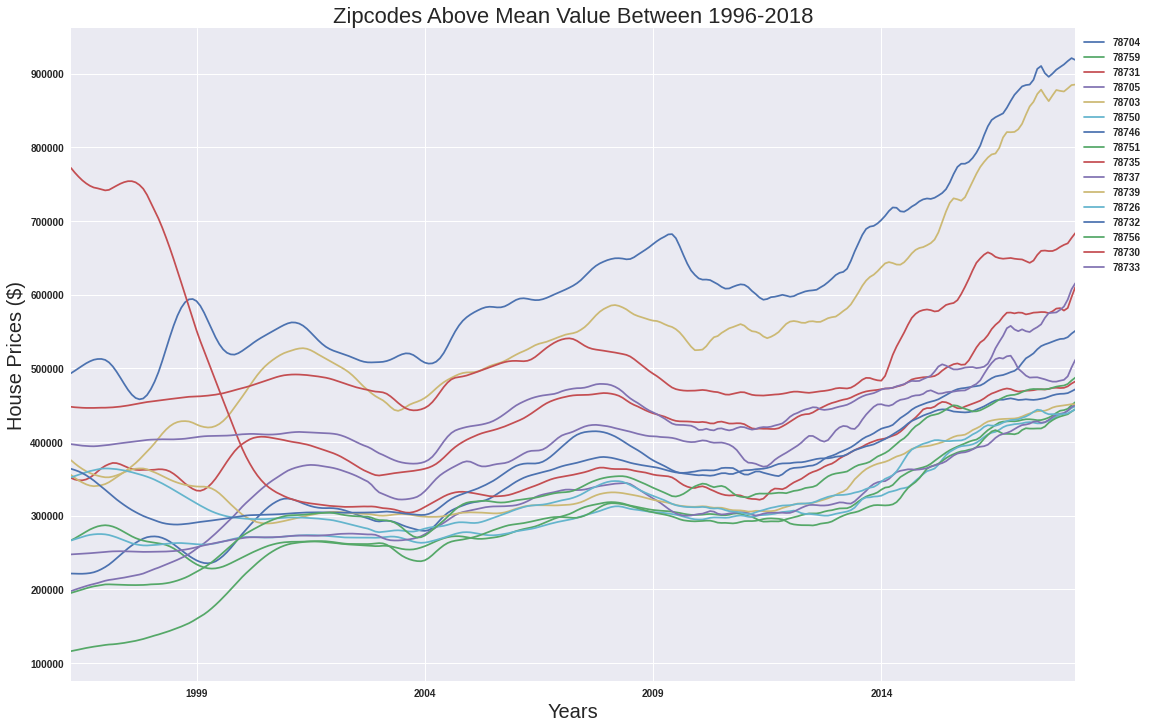

In [32]:
# Lets visualize the zipcodes if the mean value for zipcode is higher
# than the mean value of the total zipcodes
sum(austin_eda.mean())/38
subset_cols = []
for col in austin_eda.columns:
    if austin_eda[col].mean() > sum(austin_eda.mean())/38:
        subset_cols.append(col)

austin_eda[subset_cols].plot(figsize=(18,12))
plt.title('Zipcodes Above Mean Value Between 1996-2018', fontsize=22)
plt.xlabel('Years', fontsize=20)
plt.ylabel('House Prices ($)', fontsize=20)
plt.legend(bbox_to_anchor=[1,1])
plt.show();

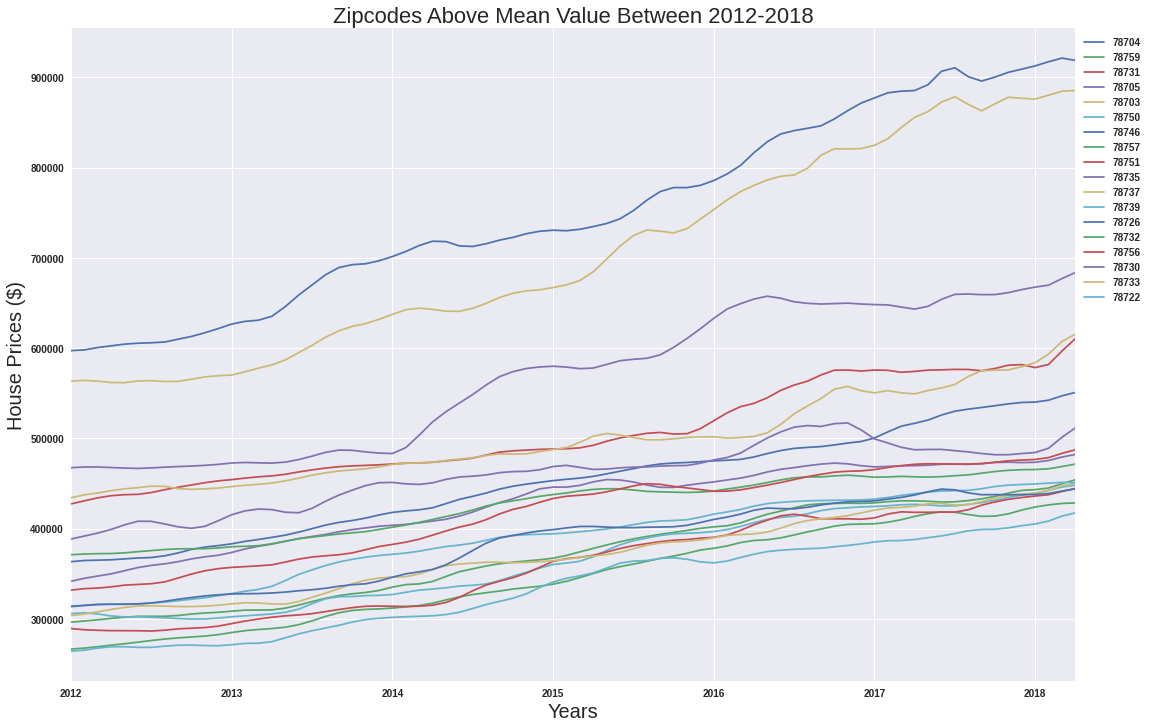

In [33]:
sum(austin_eda['2012':].mean())/38
subset_cols = []
for col in austin_eda['2012':].columns:
    if austin_eda['2012':][col].mean() > sum(austin_eda['2012':].mean())/38:
        subset_cols.append(col)

austin_eda['2012':][subset_cols].plot(figsize=(18,12))
plt.title('Zipcodes Above Mean Value Between 2012-2018', fontsize=22)
plt.xlabel('Years', fontsize=20)
plt.ylabel('House Prices ($)', fontsize=20)
plt.legend(bbox_to_anchor=[1,1])
plt.show();

#### Value Change in Each Zipcode

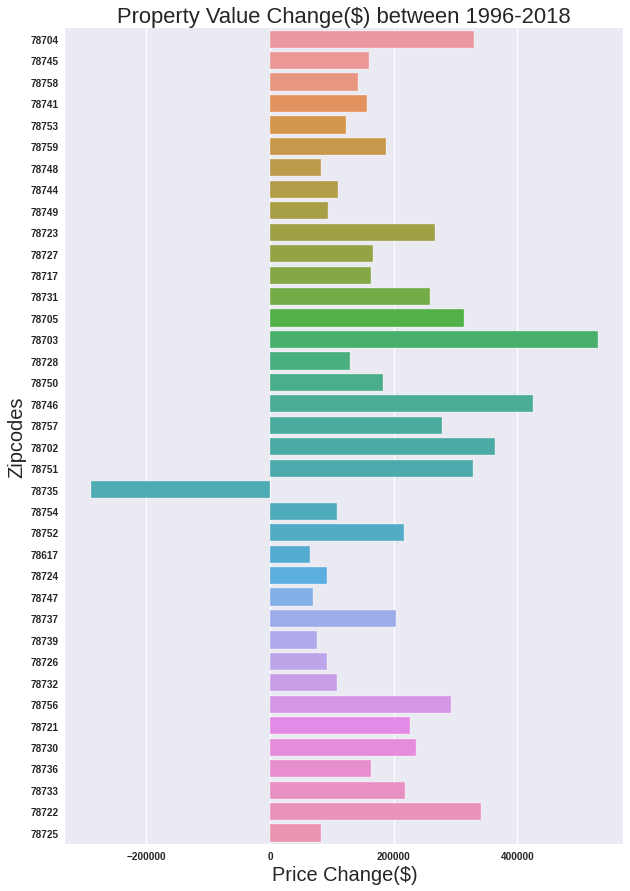

In [34]:
zipcodes = austin_eda.columns
value_change = []
for col in austin_eda.columns:
    value_change.append(austin_eda[col][-1] - austin_eda[col][0])
plt.figure(figsize=(10,15))
sns.barplot(y=zipcodes, x=value_change)
plt.title('Property Value Change($) between 1996-2018', fontsize=22)
plt.xlabel('Price Change($)', fontsize=20)
plt.ylabel('Zipcodes', fontsize=20);

We observe that property values has been increasing at different ratios between 1996 and 2018 for all the zipcodes except zipcode **78735**. Highest change over this time period is for zipcode **78703** and **78746**.

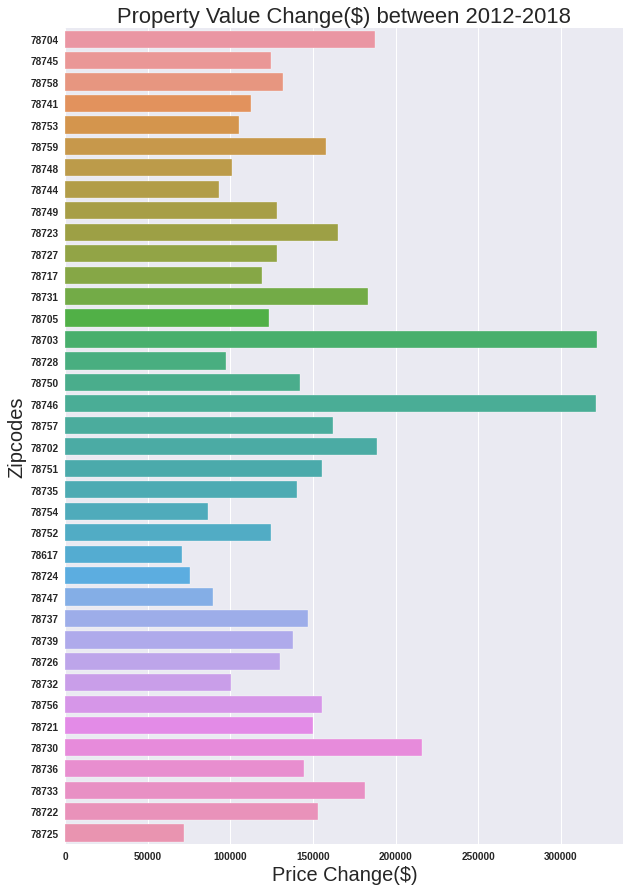

In [35]:
austin_2012 = austin_eda['2012':]
zipcodes = austin_2012.columns
value_change = []
for col in austin_2012.columns:
    value_change.append(austin_2012[col][-1] - austin_2012[col][0])
plt.figure(figsize=(10,15))
sns.barplot(y=zipcodes, x=value_change)
plt.title('Property Value Change($) between 2012-2018', fontsize=22)
plt.xlabel('Price Change($)', fontsize=20)
plt.ylabel('Zipcodes', fontsize=20);

78703 and 78746 still have the highest price change between 2012 and 2018. We also see that there is a positive change **78735** which is negative for 1996-2018 period.

## DATA PREPROCESSING


For time series modeling, we will select a subset of dataframe to analyze. For our project, we will select the zipcodes in Austin, TX. 


In [80]:
austin = df[(df['State'] == 'TX') & (df['City'] == 'Austin')]
print('Number of Zipcodes in Austin Dataset:', austin['RegionName'].nunique())
austin.head(38)

Number of Zipcodes in Austin Dataset: 38


RegionID  RegionName    City State  ... 2018-01 2018-02  2018-03  2018-04
66       92617       78704  Austin    TX  ...  540200  542300   547100   550900
98       92654       78745  Austin    TX  ...  291300  292600   294000   294700
422      92667       78758  Austin    TX  ...  255100  260100   266000   270400
432      92651       78741  Austin    TX  ...  241000  243600   247400   250400
502      92662       78753  Austin    TX  ...  227100  228700   231500   233400
507      92668       78759  Austin    TX  ...  443200  445000   449900   454100
594      92657       78748  Austin    TX  ...  277800  279000   280800   282000
1671     92653       78744  Austin    TX  ...  192100  193200   194500   195500
1936     92658       78749  Austin    TX  ...  349700  352100   355500   357700
2462     92634       78723  Austin    TX  ...  355800  358700   361900   364200
2644     92638       78727  Austin    TX  ...  311800  313400   315200   316500
2649     92628       78717  Austin    TX  ...  356600  359500   362300   363600
2706     92642       78731  Austin    TX  ...  578400  581900   596700   610500
3035     92618       78705  Austin    TX  ...  484300  489100   501200   511600
3371     92616       78703  Austin    TX  ...  875900  880100   884600   885300
3428     92639       78728  Austin    TX  ...  260700  262300   265000   266500
3526     92659       78750  Austin    TX  ...  439100  442400   446100   448200
3581     92655       78746  Austin    TX  ...  912600  917200   921200   918700
3885     92666       78757  Austin    TX  ...  424000  426300   427900   428500
3926     92615       78702  Austin    TX  ...  410100  413800   417300   419800
4969     92660       78751  Austin    TX  ...  436100  437600   441200   444500
5068     92646       78735  Austin    TX  ...  473500  475500   479300   482200
5213     92663       78754  Austin    TX  ...  235100  235700   238300   240600
5307     92661       78752  Austin    TX  ...  300400  301400   302300   303100
6239     92555       78617  Austin    TX  ...  183100  184300   186000   187100
6302     92635       78724  Austin    TX  ...  186400  187900   189100   189300
6533     92656       78747  Austin    TX  ...  244800  246600   249300   251200
6629     92648       78737  Austin    TX  ...  439200  442400   447400   450400
6668     92650       78739  Austin    TX  ...  449500  450400   451300   451000
6704     92637       78726  Austin    TX  ...  437900  438900   441600   444100
6826     92643       78732  Austin    TX  ...  465500  466300   468800   471500
8022     92665       78756  Austin    TX  ...  476600  478700   483400   487400
8350     92632       78721  Austin    TX  ...  296300  297800   297200   296100
8427     92641       78730  Austin    TX  ...  667600  669700   677000   683700
8832     92647       78736  Austin    TX  ...  328400  332600   339900   344900
9323     92644       78733  Austin    TX  ...  583900  593400   607300   615600
9335     92633       78722  Austin    TX  ...  405200  408400   413900   417500
9550     92636       78725  Austin    TX  ...  186000  187000   187700   188200

[38 rows x 272 columns]

#### Converting Datetime Format

In [82]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

get_datetimes(austin)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

#### Reshaping


We will use the provided _melt_data_ function to reshape our dataset from wide format to long format.


In [83]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [84]:
austin_ts = melt_data(austin.drop(['RegionID','SizeRank'], axis=1))
print('Length of Dataset:', len(austin_ts))
austin_ts

Length of Dataset: 265


value
time                     
1996-04-01  217871.052632
1996-05-01  217673.684211
1996-06-01  217610.526316
1996-07-01  217657.894737
1996-08-01  217792.105263
...                   ...
2017-12-01  393878.947368
2018-01-01  395323.684211
2018-02-01  397786.842105
2018-03-01  401765.789474
2018-04-01  404497.368421

[265 rows x 1 columns]

### Time Series Plotting

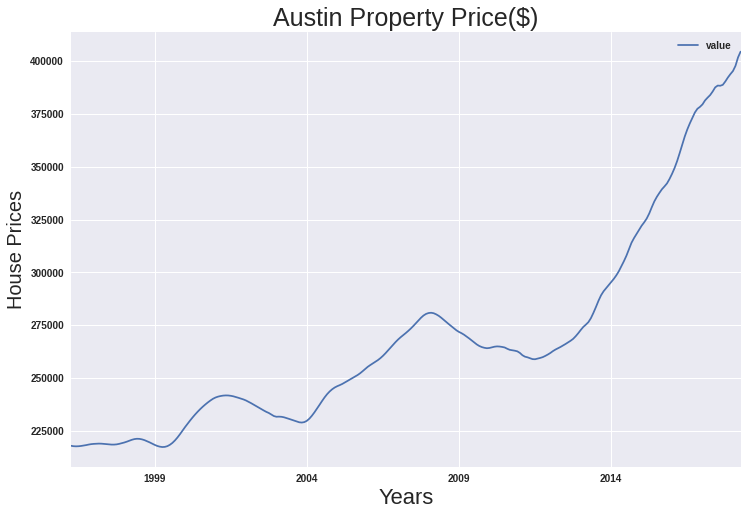

In [85]:
austin_ts.plot(kind='line', figsize=(12,8), label='Price')
plt.title('Austin Property Price($)', fontsize=25)
plt.xlabel('Years', fontsize=22)
plt.ylabel('House Prices', fontsize=20)
plt.legend()
plt.show();

We observe fluctuations over the period of 1996 to 2012 and and positive increasing trend between 2012 and 2018. 

Let's check trends and seasonality in detail.

### Stationarity Check

We will use the following ways to asses trends.
1. Rolling Statistics
2. The Dickey-Fuller Test

In [86]:
# Stationarity Check with Rolling Statistics and Dickey-Fuller Test

def stationarity_check(ts):
            
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(ts) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results

    print('\nResults of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    # return None

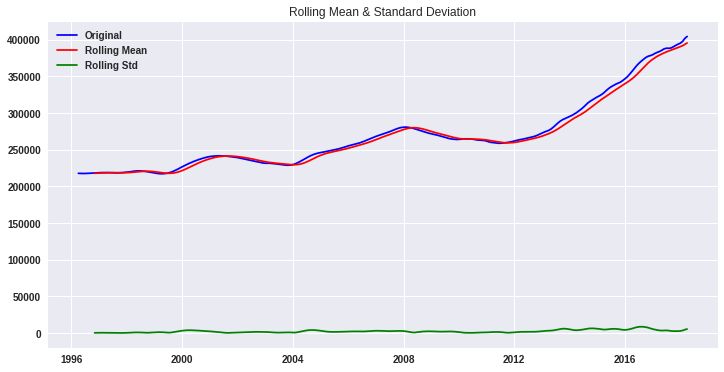


Results of Dickey-Fuller Test: 

Test Statistic                   0.599528
p-value                          0.987604
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [87]:
stationarity_check(austin_ts)

The Null Hypothesis for the Dickey-Fuller Test is **that the time series is not stationary**. If the test statistic is less than critical value, we reject the Null Hypothesis and say the series is **stationary**. 

The p-value of time series is 0.987604, which is much bigger than 0.05. In this circumstances we fail to reject the Null Hypothesis.

We also observe that the mean is not constant over time. The variation in standard deviation very small but not nonexistent. 

Based on our observations, we can confirm that the times series has a trend with a seasonality therefore it is not stationary. 

Let's detrend our times series with 

1.   _Log Transformation_
2.   _Subtracting the Rolling Mean_
3.   _Differencing_

#### 1.Log Transformation

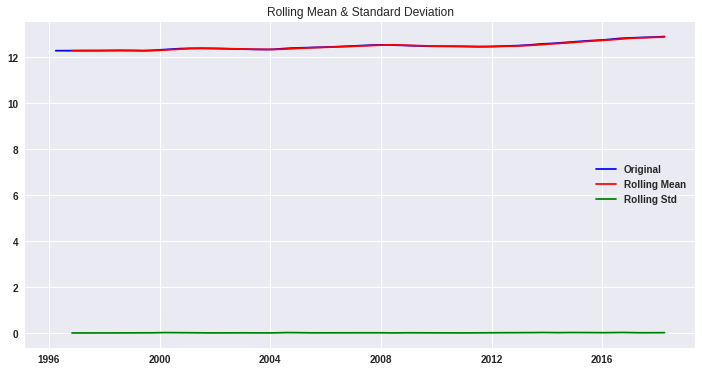


Results of Dickey-Fuller Test: 

Test Statistic                   0.334023
p-value                          0.978853
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [88]:
# Apply Log Transformation
stationarity_check(np.log(austin_ts))

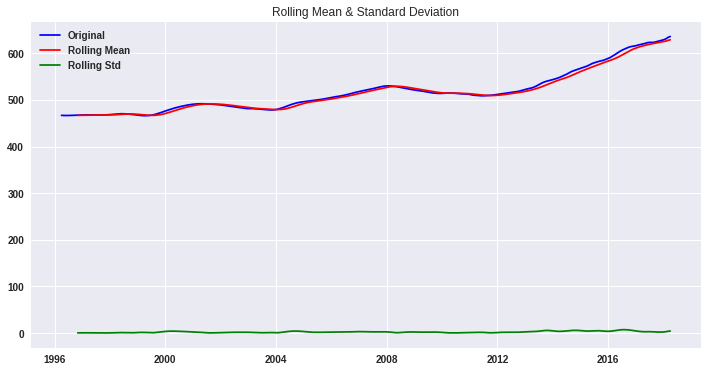


Results of Dickey-Fuller Test: 

Test Statistic                   0.477131
p-value                          0.984161
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [89]:
# Take Square Root 
stationarity_check(np.sqrt(austin_ts))

We applied log transformation and square root. Our plots shows sign of improvement even though **p-value > 0.05** for both method. They are not enough to detrend the time series by themselves.

#### 2.Subtracting the Rolling Mean

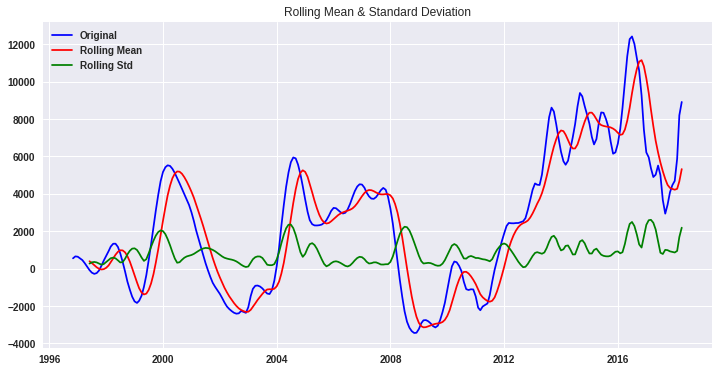


Results of Dickey-Fuller Test: 

Test Statistic                  -1.725502
p-value                          0.418023
#Lags Used                      16.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [90]:
# Using Rolling Mean
roll_mean = austin_ts.rolling(window=8).mean()
ts_minus_roll_mean = austin_ts - roll_mean
ts_minus_roll_mean.dropna(inplace=True)
stationarity_check(ts_minus_roll_mean)

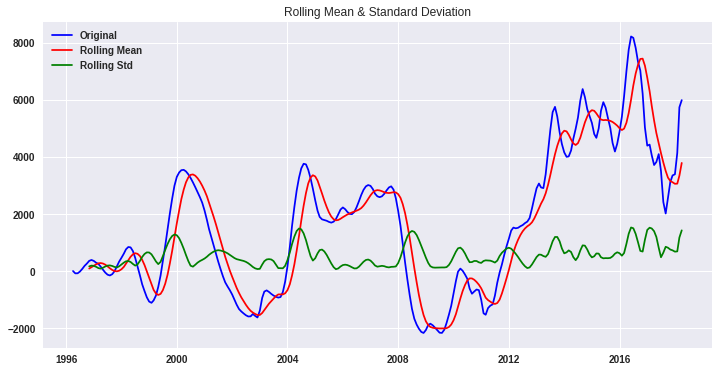


Results of Dickey-Fuller Test: 

Test Statistic                  -1.958526
p-value                          0.305049
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [91]:
# Using Weighted Rolling Mean
exp_roll_mean = austin_ts.ewm(halflife=2).mean()
ts_minus_exp_roll_mean = austin_ts - exp_roll_mean
ts_minus_exp_roll_mean.dropna(inplace=True)
stationarity_check(ts_minus_exp_roll_mean)

Substracting rolling mean and weighted rolling mean did not help to detrend out time series. p-value is still a higher value than 0.05.

#### 3.Differencing

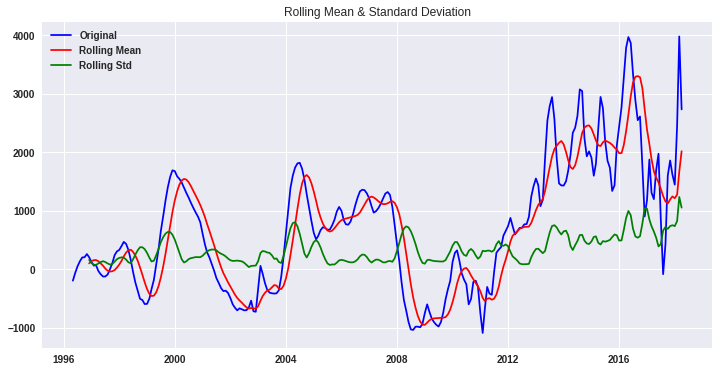


Results of Dickey-Fuller Test: 

Test Statistic                  -1.817267
p-value                          0.371923
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [92]:
# Detrending using .diff()
austin_diff = austin_ts.diff(periods=1)
austin_diff.dropna(inplace=True)
stationarity_check(austin_diff)

Differencing help lowering p-value but it is still too high. We fail to reject the Null Hypothesis.

### Decomposition

Let's check trends and seasonality in details using decomposition method.

In [93]:
# Decomposition
def decomposition_plot(ts):
# Apply seasonal_decompose 
    decomposition = seasonal_decompose(np.log(ts))
    
# Get trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(np.log(ts), label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()

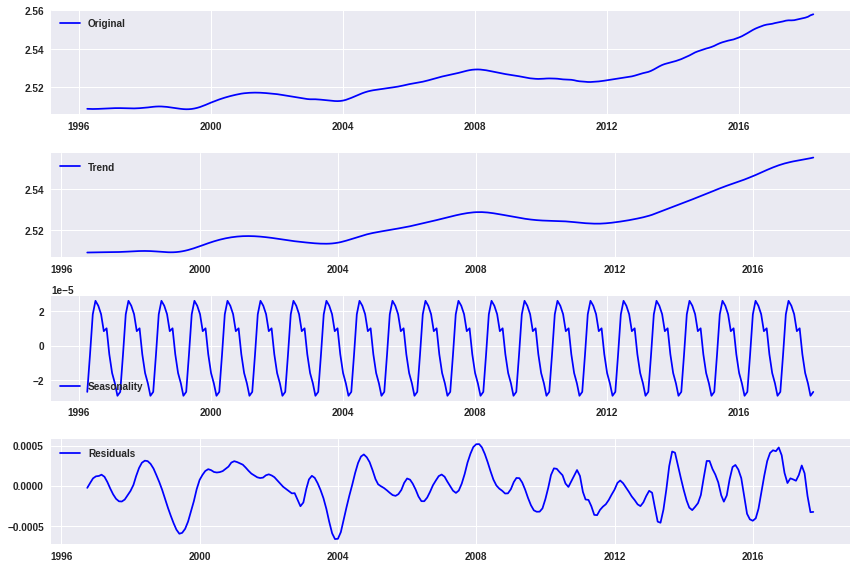

In [94]:
decomposition_plot(np.log(austin_ts))

Lets check stationarity of residuals using our _stationarity_check_ function.


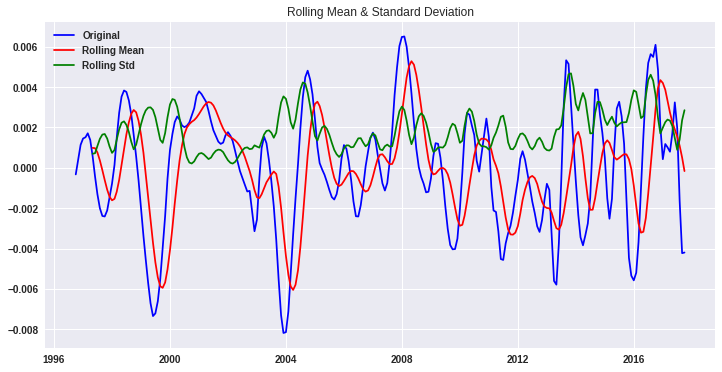


Results of Dickey-Fuller Test: 

Test Statistic                  -4.865467
p-value                          0.000041
#Lags Used                      11.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [95]:
decomposition = seasonal_decompose(np.log(austin_ts))
residual_decomp = decomposition.resid
residual_decomp.dropna(inplace=True)

stationarity_check(residual_decomp)

The Dickey-Fuller test statistic is significant for the residuals and very well below a 0.01 mark and p-value is smaller than 0.05. So it seems reasonable to assume the log transformation applied time series is stationary.

### Plotting ACF and PACF

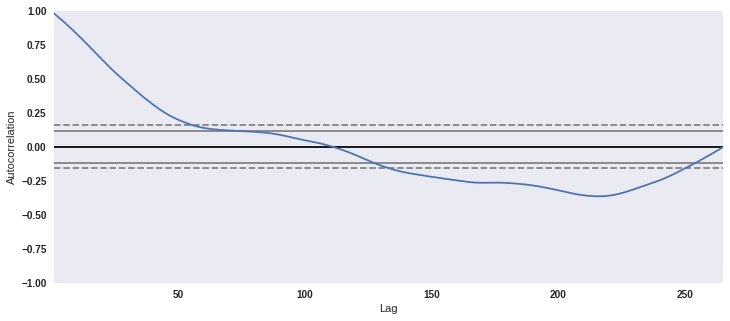

In [96]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(np.log(austin_ts));

The analysis of autocorrelation helps us find repeating periodic patterns in a time series. Our series is heavily  positive autocorrelated at first, then there is a decay(and insignificance) and then we observe a negative autocorrelation. And around lag 250 we see an increase towards 0. Let's examine further if this is a pattern or random.

In [97]:
def plot_acf_pacf(ts, figsize=(10,8),lags=24):
    
    fig,ax = plt.subplots(nrows=3, figsize=figsize)
    
    # Plot ts
    ts.plot(ax=ax[0])
    
    # Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags) 
    fig.tight_layout()
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    return fig,ax

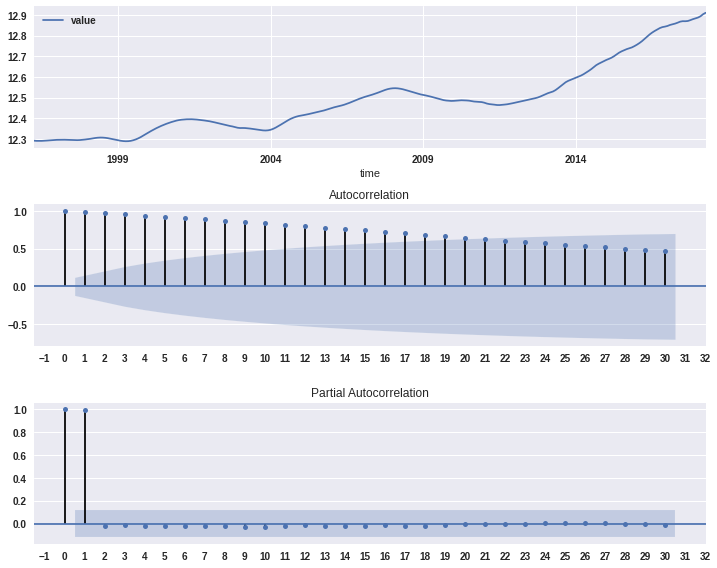

In [98]:
plot_acf_pacf(np.log(austin_ts), lags=30);

*   The autocorrelation function (ACF) plot shows a very slow, linear decay pattern which is typical of a nonstationary time series.

*   By default, confidence intervals are set to 0.95. The darker cone shape on Autocorrelation plot shows that the correlation values outside of the cone are very likely a correlation and not due to randomness.

*   When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is a typical result for random walk series!

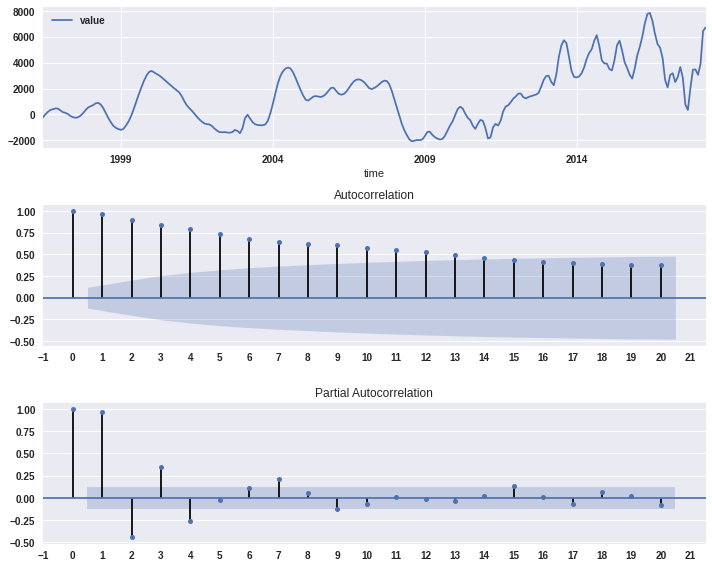

In [99]:
# Apply differencing
d = 2
plot_acf_pacf(austin_ts.diff(d).dropna(),lags=20);

## MODELING


### Step by Step Modeling

*   Detrend time series
*   Check stationarity with rolling mean/std and Dickey-Fuller Test
*    Check stationarity for residuals with rolling mean/std and Dickey-Fuller Test
*   ACF and PACF plotting


#### Parameter Selection

[Duke University School of Business Guide on Time Series](https://people.duke.edu/~rnau/411home.htm)

*   [Selecting the right I (differencing)](https://people.duke.edu/~rnau/411arim2.htm)
*   [Selecting AR/MA (P,Q) Orders](https://people.duke.edu/~rnau/411arim3.htm)
*   [Summary: Selecting your ARIMA Orders](https://people.duke.edu/~rnau/arimrule.htm)

For parameter selection, we will use ACF and PACF. According to the sources above, 
- If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.(d)
- If the partial autocorrelation function (PACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding one or more AR terms to the model. The lag beyond which the PACF cuts off is the indicated number of AR terms. (p)
- **AR and MA signatures:** If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. (p over q)


In [100]:
# Hand select p, d, q values according to ACF and PACF
d = 2
p = 1
q = 0

We have observed that our times series has visible fluctuations between the years 1996-2012, and an increase after 2012 till the end of data. For this time series analysis, we will use the data after 2012.

Length of Dataset: 76 



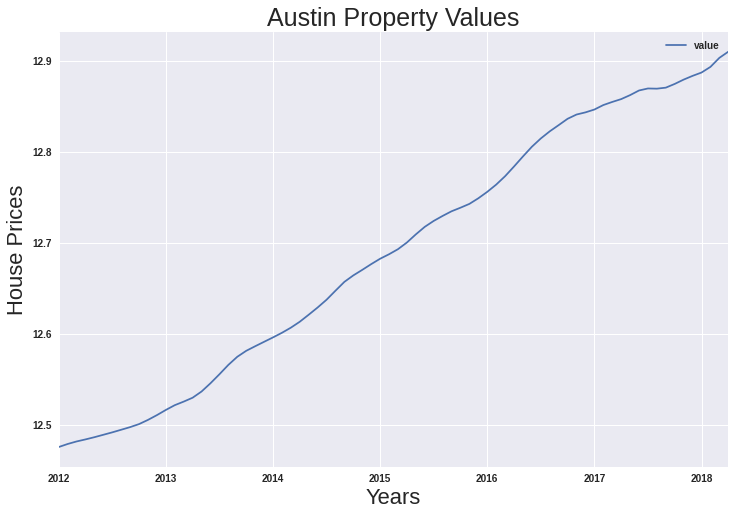

In [101]:
ts = np.log(austin_ts['2012':])
print('Length of Dataset:', len(ts), '\n')
ts.plot(kind='line', figsize=(12,8))
plt.title('Austin Property Values', fontsize=25)
plt.xlabel('Years', fontsize=22)
plt.ylabel('House Prices', fontsize=22)
plt.legend()
plt.show();


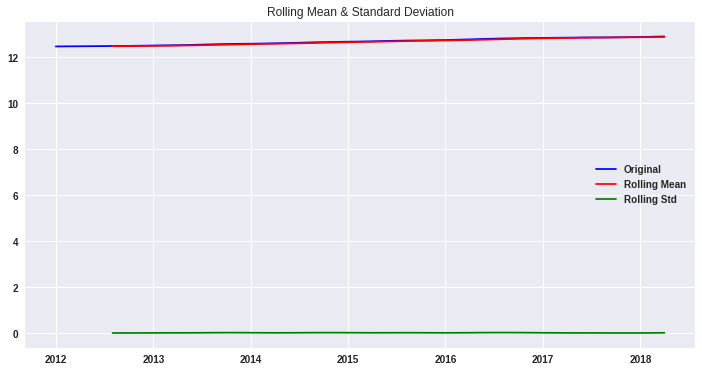


Results of Dickey-Fuller Test: 

Test Statistic                 -1.408888
p-value                         0.578008
#Lags Used                      9.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [102]:
stationarity_check(ts)

#### Train Test Split

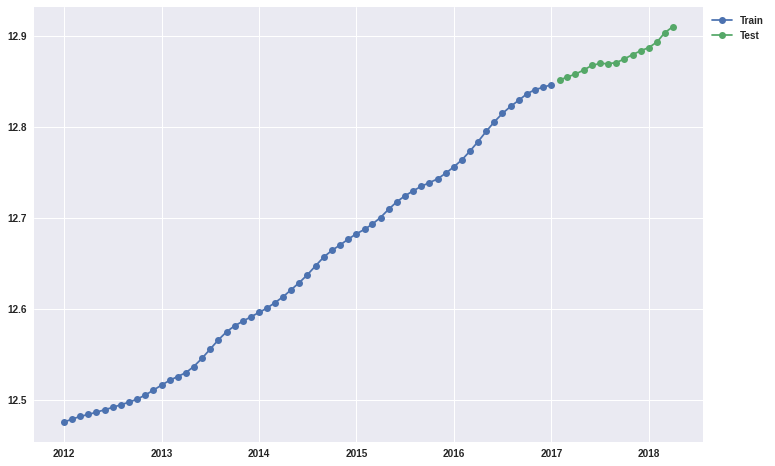

In [103]:
# Train Test Split Index
train_size = 0.8
split_idx = round(len(ts)* train_size)
split_idx

# Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)
ax.legend(bbox_to_anchor=[1,1]);

#### Baseline Model

We will use p, d, q values we picked in the previous step to build baseline model. **pdq = (1,2,0)**

In [104]:
base_model = SARIMAX(train, order=(p,d,q)).fit()
display(base_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   61
Model:               SARIMAX(1, 2, 0)   Log Likelihood                 324.784
Date:                Sun, 20 Dec 2020   AIC                           -645.569
Time:                        23:18:50   BIC                           -641.414
Sample:                    01-01-2012   HQIC                          -643.947
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5363      0.120      4.458      0.000       0.301       0.772
sigma2      9.563e-07   1.68e-07      5.702      0.000    6.28e-07    1.28e-06
===================================================================================
Ljung-Box (L1) (Q):                   3.21   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.07   Prob(JB):                         0.70
Heteroskedasticity (H):               1.48   Skew:                            -0.25
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Our base model used SARIMAX(1,2,0) and have p-values smaller than 0.05which indicates that it is acceptable.

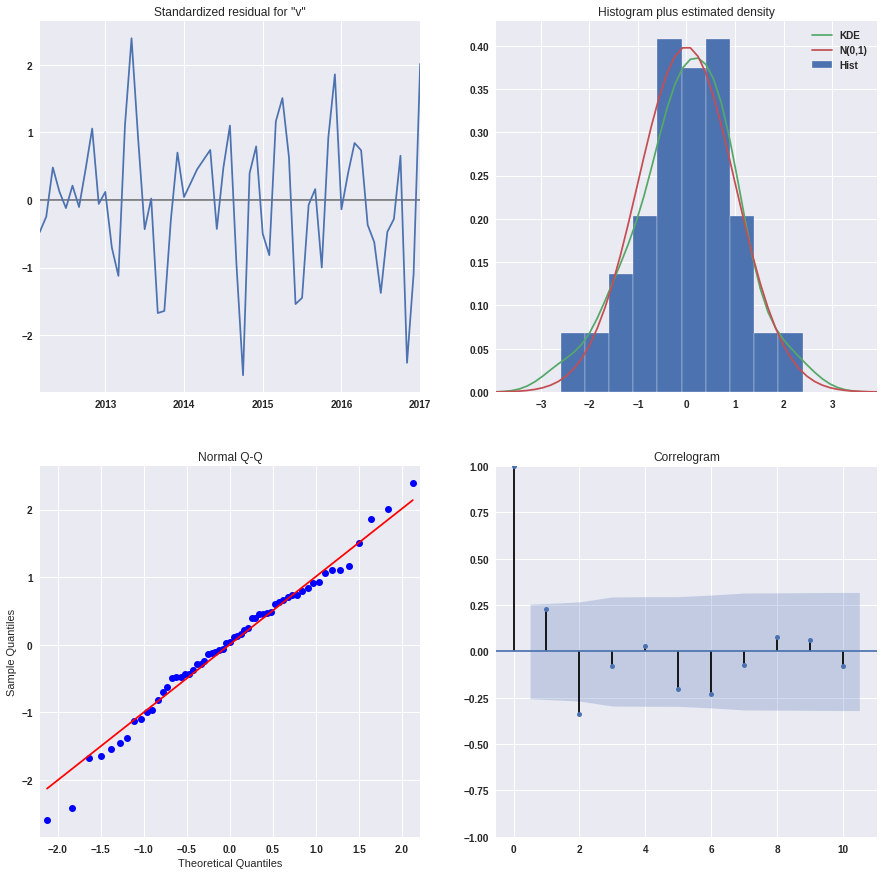

In [105]:
base_model.plot_diagnostics(figsize=(15,15));

According to model diagnostics, residuals are clustered around 0 and they follow a normal distribution. QQ-Plot looks good beside couple outliers. 

#### Model Forecast

In [106]:
def forecast_to_df(model, steps=12):
    forecast = model.get_forecast(steps=steps)
    pred_df = forecast.conf_int()
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

In [107]:
pred_df = forecast_to_df(base_model, steps=len(test))
pred_df

lower      upper       pred
2017-02-01  12.848345  12.852178  12.850262
2017-03-01  12.848761  12.859212  12.853987
2017-04-01  12.847969  12.867681  12.857825
2017-05-01  12.846081  12.877369  12.861725
2017-06-01  12.843210  12.888105  12.865657
2017-07-01  12.839453  12.899761  12.869607
2017-08-01  12.834893  12.912240  12.873566
2017-09-01  12.829597  12.925464  12.877531
2017-10-01  12.823619  12.939376  12.881498
2017-11-01  12.817005  12.953927  12.885466
2017-12-01  12.809794  12.969077  12.889435
2018-01-01  12.802015  12.984794  12.893405
2018-02-01  12.793698  13.001051  12.897375
2018-03-01  12.784866  13.017824  12.901345
2018-04-01  12.775539  13.035091  12.905315

#### Validation

In [108]:
#Validate model by MSE
pred = pred_df['pred']
# Calculate MSE
mse = mean_squared_error(pred, test)
print('Mean Squared Error :', mse)

Mean Squared Error : 1.71161509595968e-05


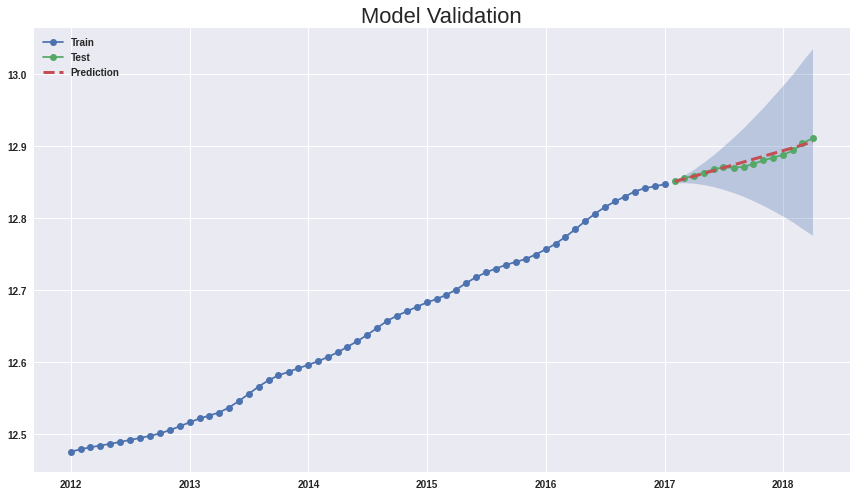

In [109]:
# Plotting Predictions
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

plot_train_test_pred(train,test,pred_df);

### Auto Arima

We will use _**auto_arima**_ from **pmdarima** to select the best parameters for our times series model.

In [110]:
# Getting best parameters on Train Set
auto_model = auto_arima(train, start_p=0, start_q=0)
print('Best p,d,q order: {} x {}'.format(auto_model.order, auto_model.seasonal_order))

Best p,d,q order: (4, 1, 0) x (0, 0, 0, 0)


In [111]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(4, 1, 0)   Log Likelihood                 343.479
Date:                Sun, 20 Dec 2020   AIC                           -674.957
Time:                        23:19:02   BIC                           -662.391
Sample:                             0   HQIC                          -670.042
                                 - 61                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.000      3.365      0.001       0.001       0.002
ar.L1          1.7404      0.136     12.836      0.000       1.475       2.006
ar.L2         -1.5144      0.256     -5.927      0.000      -2.015      -1.014
ar.L3          0.9586      0.258      3.717      0.000       0.453       1.464
ar.L4         -0.3943      0.129     -3.054      0.002      -0.647      -0.141
sigma2       5.86e-07   1.37e-07      4.289      0.000    3.18e-07    8.54e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.41   Prob(JB):                         0.43
Heteroskedasticity (H):               1.15   Skew:                            -0.37
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

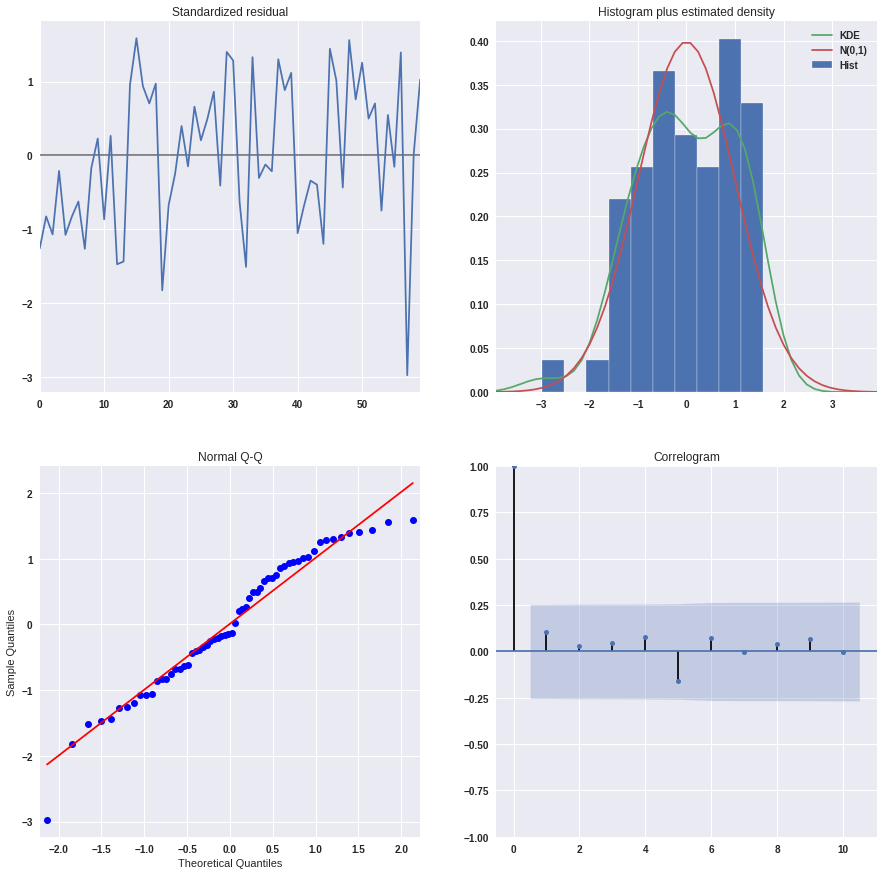

In [112]:
auto_model.plot_diagnostics(figsize=(15,15));

In [113]:
pred_mean,pred_conf_int = auto_model.predict(return_conf_int=True)
pred_mean 

array([12.85160396, 12.85706582, 12.86256495, 12.8685857 , 12.87535408,
       12.88243028, 12.88939532, 12.89621172, 12.90293807, 12.90950488])

In [114]:
pred_df = pd.DataFrame({'prediction':pred_mean, 
                        'conf_int_lower':pred_conf_int[:,0],
                        'conf_int_upper':pred_conf_int[:,1]},
                        index= pd.date_range(test.index[0],
                                                  periods=len(pred_mean), freq='M'))
# auto_model.conf_int()
pred_df

prediction  conf_int_lower  conf_int_upper
2017-02-28   12.851604       12.850104       12.853104
2017-03-31   12.857066       12.852689       12.861443
2017-04-30   12.862565       12.854825       12.870305
2017-05-31   12.868586       12.857581       12.879590
2017-06-30   12.875354       12.861266       12.889442
2017-07-31   12.882430       12.865460       12.899401
2017-08-31   12.889395       12.869885       12.908906
2017-09-30   12.896212       12.874609       12.917814
2017-10-31   12.902938       12.879663       12.926213
2017-11-30   12.909505       12.884883       12.934126

In [115]:
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (4, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

#### Validation

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   15
Model:               SARIMAX(4, 1, 0)   Log Likelihood                  54.527
Date:                Sun, 20 Dec 2020   AIC                            -99.054
Time:                        23:19:09   BIC                            -95.859
Sample:                    02-01-2017   HQIC                           -99.350
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0002      1.384      0.000      1.000      -2.712       2.712
ar.L2          0.0001      2.274   5.33e-05      1.000      -4.456       4.456
ar.L3       9.979e-05      1.860   5.36e-05      1.000      -3.646       3.646
ar.L4       9.655e-05      1.410   6.85e-05      1.000      -2.763       2.763
sigma2      3.132e-05   2.38e-05      1.315      0.188   -1.53e-05     7.8e-05
===================================================================================
Ljung-Box (L1) (Q):                   5.93   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.01   Prob(JB):                         0.68
Heteroskedasticity (H):               2.98   Skew:                             0.48
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

______________________________________________________________________________________________________________




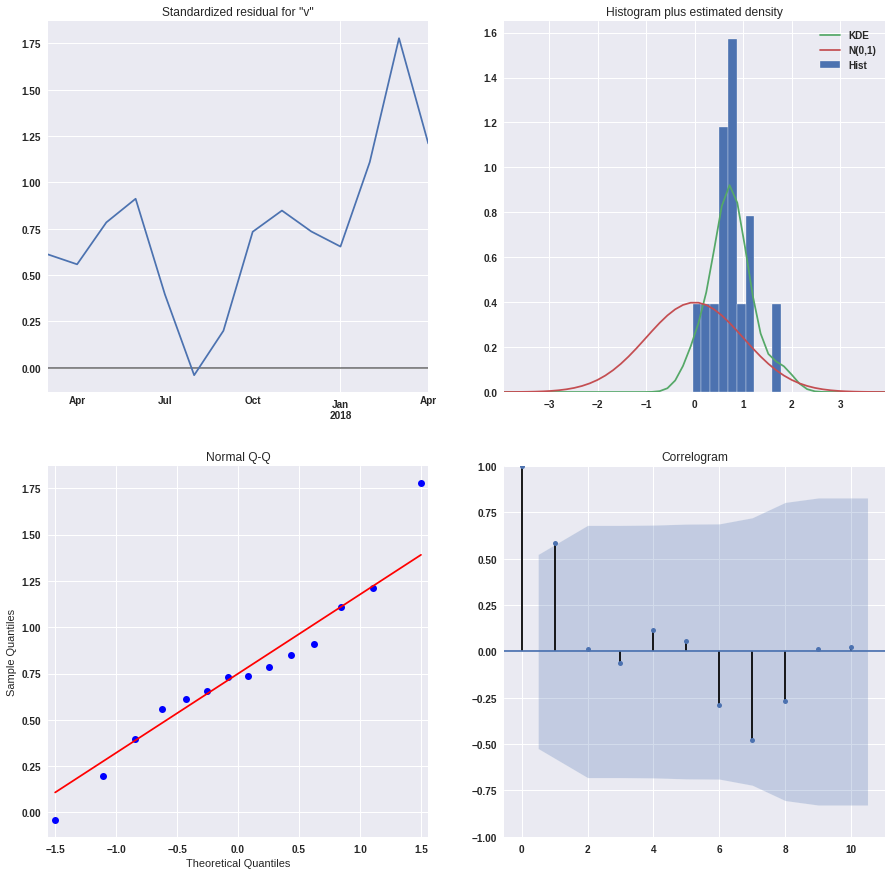

In [116]:
# Fit auto_arima model that is trained on training set to test dataset.
best_model = SARIMAX(test,
                     order=auto_model.order,
                     seasonal_order=auto_model.seasonal_order).fit()
display(best_model.summary())
print(110*'_')
print('\n')
best_model.plot_diagnostics(figsize=(15,15));

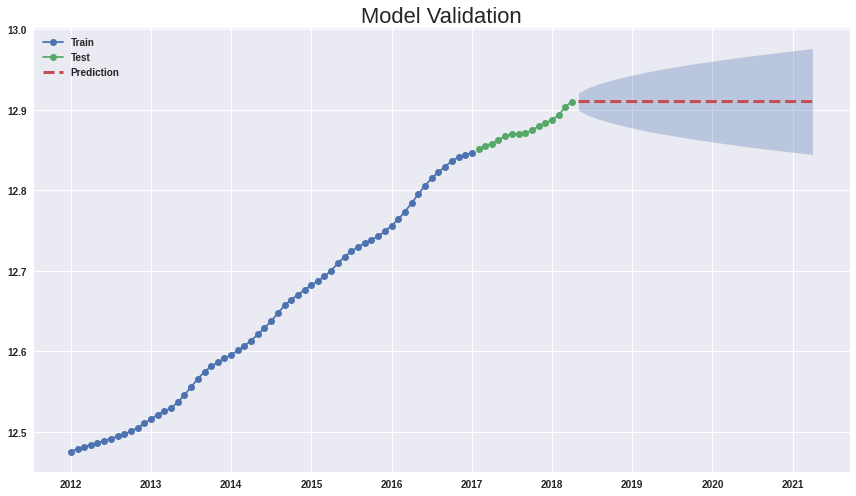

In [117]:
# Make predictions for the next 36 months
pred_df = forecast_to_df(best_model, steps=36)
plot_train_test_pred(train,test,pred_df);

### Pilot Zipcode Modeling


In order to create a roadmap to guide us make predictions for all the zipcodes, we will start modeling with a single zipcode. For this purpose, we selected ***78758*** as out pilot zipcode.

In [118]:
df_model = df.copy()
df_model['ZipCodes'] = df_model['RegionName'].astype(str)

austin_model = df_model[(df_model['State'] == 'TX') & (df_model['City'] == 'Austin')]
austin_78758 = austin_model.groupby('ZipCodes').get_group('78758')
austin_78758

RegionID  RegionName    City State  ... 2018-02 2018-03  2018-04  ZipCodes
422     92667       78758  Austin    TX  ...  260100  266000   270400     78758

[1 rows x 273 columns]

In [119]:
ts_78758 = melt_data(austin_78758.drop(['RegionID','SizeRank','ZipCodes'], axis=1))
ts_78758.head()

value
time                
1996-04-01  129000.0
1996-05-01  128300.0
1996-06-01  127500.0
1996-07-01  126900.0
1996-08-01  126300.0

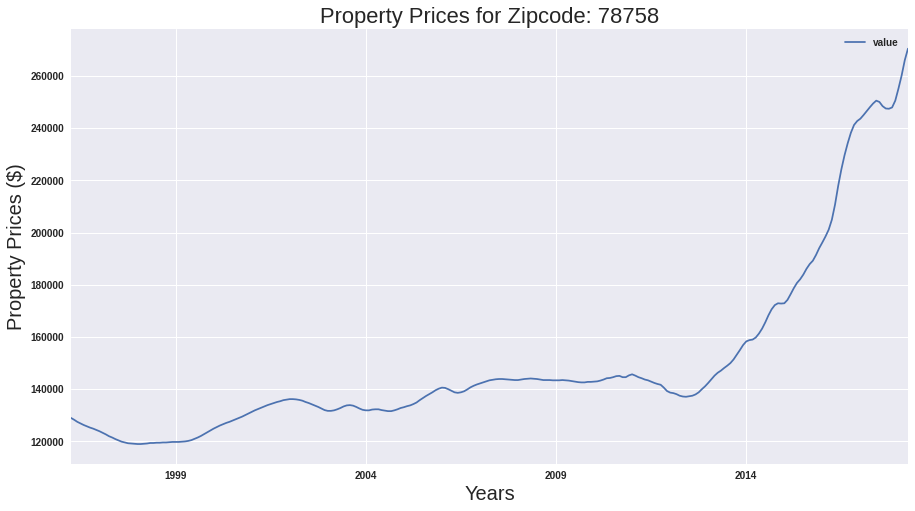

In [120]:
ts_78758.plot(figsize=(15,8))
plt.title('Property Prices for Zipcode: 78758', fontsize=22)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Property Prices ($)', fontsize=20)
plt.legend()
plt.show();

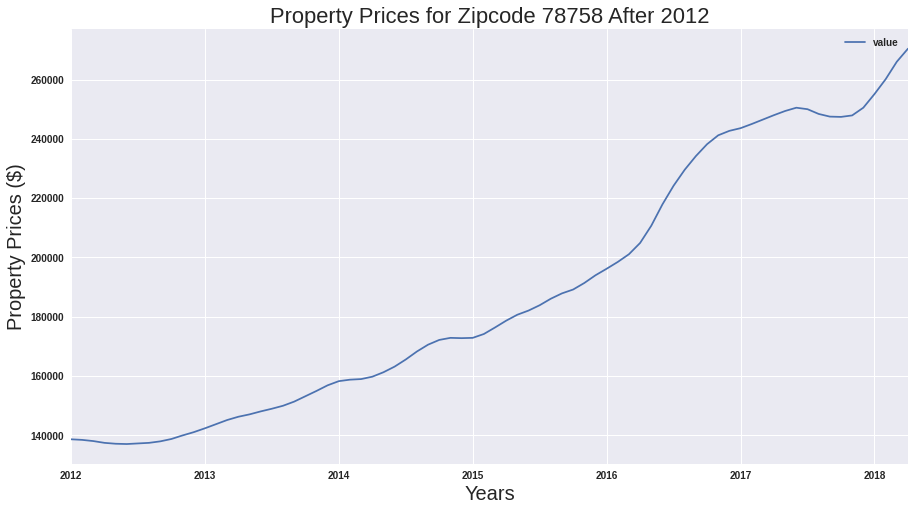

In [121]:
# Select Time Series after 2012
ts = ts_78758['2012':]
ts.plot(figsize=(15,8))
plt.title('Property Prices for Zipcode 78758 After 2012', fontsize=22)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Property Prices ($)', fontsize=20)
plt.legend()
plt.show();

In [122]:
# Check the statistics of value for this zipcode
ts.describe()

value
count      76.000000
mean   188081.578947
std     42693.445900
min    137100.000000
25%    149750.000000
50%    175300.000000
75%    235200.000000
max    270400.000000

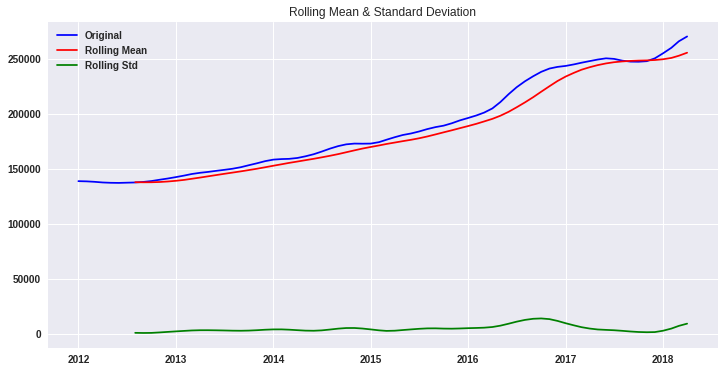


Results of Dickey-Fuller Test: 

Test Statistic                  1.478026
p-value                         0.997441
#Lags Used                     10.000000
Number of Observations Used    65.000000
Critical Value (1%)            -3.535217
Critical Value (5%)            -2.907154
Critical Value (10%)           -2.591103
dtype: float64


In [123]:
# Stationarity Check
stationarity_check(ts)

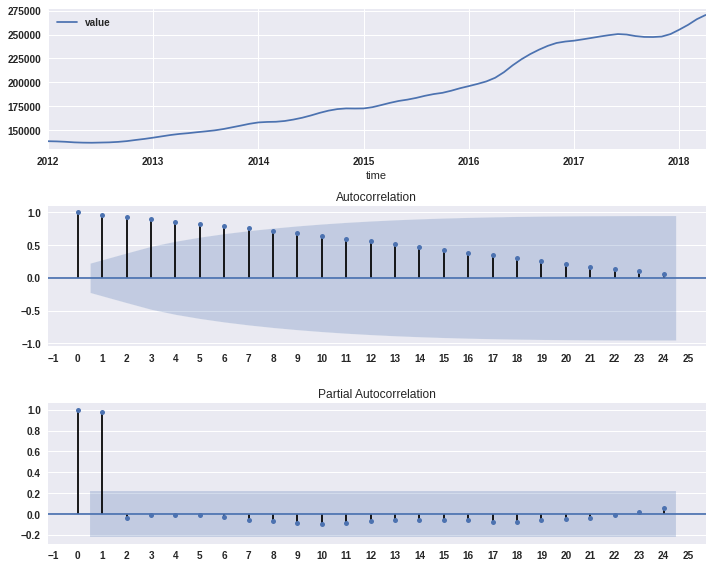

In [124]:
# Plot ACF and PACF

plot_acf_pacf(ts);

In [125]:
# Set gridsearch for best parameters for auto_arima
best_parameters = []
gridsearch_model = auto_arima(ts,
                              start_p=0,
                              start_q=0,
                              information_criterion='aic',
                              verbose=1)

best_model = SARIMAX(ts,
                     order=gridsearch_model.order,
                     seasonal_order=gridsearch_model.seasonal_order).fit()

best_parameters.append([gridsearch_model.order, 
                        gridsearch_model.seasonal_order, 
                        best_model.aic]) 

print('ARIMA {} x {}12: AIC Calculated: {}'.format(gridsearch_model.order, 
                                                   gridsearch_model.seasonal_order, 
                                                   best_model.aic))



ARIMA (0, 2, 0) x (0, 0, 0, 0)12: AIC Calculated: 1191.4798434100078


In [126]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   76
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -594.740
Date:                Sun, 20 Dec 2020   AIC                           1191.480
Time:                        23:19:24   BIC                           1193.784
Sample:                    01-01-2012   HQIC                          1192.399
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.598e+05   7.89e+04      7.099      0.000    4.05e+05    7.14e+05
===================================================================================
Ljung-Box (L1) (Q):                  20.22   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.00   Prob(JB):                         0.29
Heteroskedasticity (H):              12.76   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

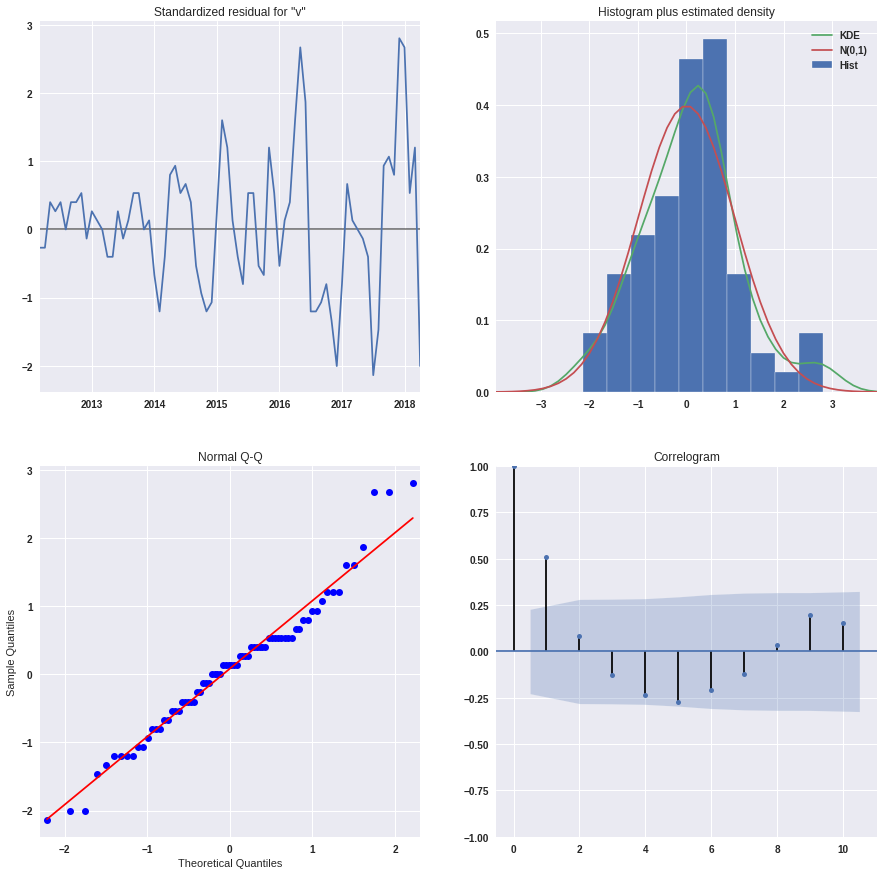

In [127]:
best_model.plot_diagnostics(figsize=(15,15));

In [128]:
pred_df = forecast_to_df(best_model, steps=18)
pred_df

lower          upper      pred
2018-05-01  273333.511177  276266.488823  274800.0
2018-06-01  275920.831303  282479.168697  279200.0
2018-07-01  278112.901262  289087.098738  283600.0
2018-08-01  279967.709911  296032.290089  288000.0
2018-09-01  281524.227807  303275.772193  292400.0
2018-10-01  282810.588230  310789.411770  296800.0
2018-11-01  283848.270241  318551.729759  301200.0
2018-12-01  284654.350054  326545.649946  305600.0
2019-01-01  285242.819251  334757.180749  310000.0
2019-02-01  285625.411462  343174.588538  314400.0
2019-03-01  285812.149642  351787.850358  318800.0
2019-04-01  285811.724367  360588.275633  323200.0
2019-05-01  285631.764690  369568.235310  327600.0
2019-06-01  285279.037778  378720.962222  332000.0
2019-07-01  284759.599717  388040.400283  336400.0
2019-08-01  284078.911810  397521.088190  340800.0
2019-09-01  283241.931906  407158.068094  345200.0
2019-10-01  282253.187233  416946.812767  349600.0

In [129]:
# Calculate MSE and use 2016-09-01 datetime as indexinf for prediction
pred = best_model.get_prediction(start=pd.to_datetime('2016-09-01'))
# Forecast Test
ts_forecasted = np.log(pred.predicted_mean)
ts_truth = np.log(ts['2016-09-01':])
# Calculate MSE
mse = mean_squared_error(ts_forecasted, ts_truth)
print('Mean Squared Error :', mse)

Mean Squared Error : 1.734559563465149e-05


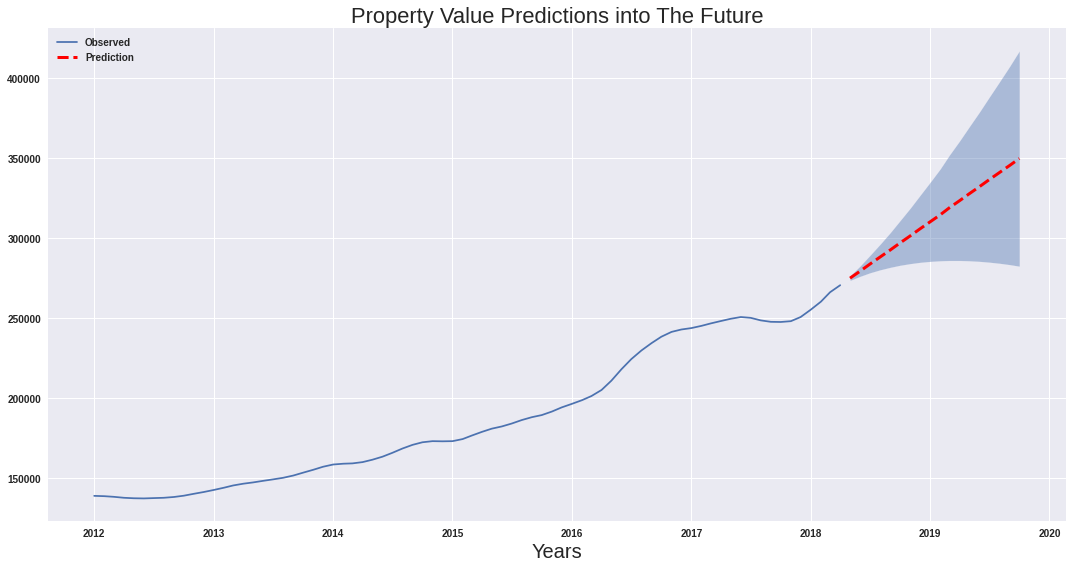

In [130]:
def plot_ts_pred(ts,pred_df):
    fig,ax = plt.subplots(figsize=(15,8))    
    ax.plot(ts,label='Observed')
    ax.plot(pred_df['pred'],label='Prediction',color='red', ls='--', linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'], alpha=0.4)
    ax.set_title('Property Value Predictions into The Future', fontsize=22)
    ax.set_xlabel('Years', fontsize=20)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

plot_ts_pred(ts,pred_df);

### Modeling Time Series

What one investor considers a "good" ROI may be unacceptable to another. A good ROI on real estate varies by risk tolerance. Real estate risk is defined as the uncertainty in achieving the investor’s expected return on the basis of which the property was acquired. The more risk you're willing to take, the higher ROI you'll expect. Conversely, risk-averse investors may happily settle for lower ROIs in exchange for more stability.


> *ROI =* $ \frac {GAIN~ON~INVESTMENT~−~COST~OF~INVESTMENT}{COST~OF~INVESTMENT} $


In [131]:
def plot_ts_pred(zipcode,ts,pred_df_18, pred_df_36):
    fig,ax = plt.subplots(figsize=(15,8))    
    ax.plot(ts,label= zipcode+'_Values', linewidth=3)

    ax.plot(pred_df_18['pred'],label='18 Month Prediction',color='red', ls='--', linewidth=5)
    ax.plot(pred_df_36['pred'],label='36 Month Prediction', ls='-.', linewidth=3)


    ax.fill_between(x=pred_df_18.index,y1=pred_df_18['lower'],y2=pred_df_18['upper'], alpha=0.3)
    ax.fill_between(x=pred_df_36.index,y1=pred_df_36['lower'],y2=pred_df_36['upper'], alpha=0.3)


    ax.set_title('Property Value Predictions For '+zipcode, fontsize=22)
    # ax.set_ylim(ymin=100000, ymax=850000)
    ax.set_xlabel('Years', fontsize=20)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax



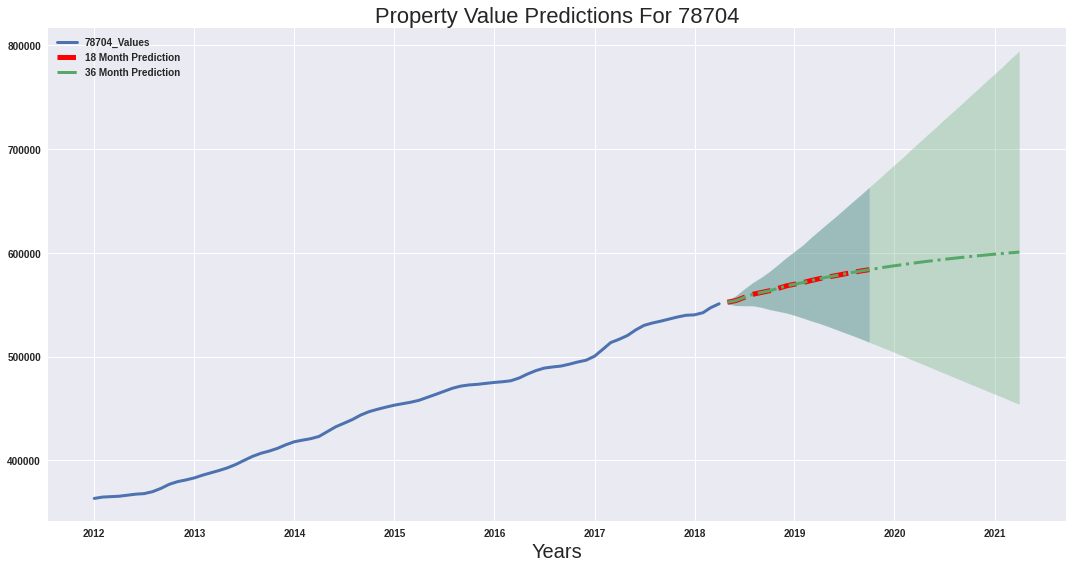

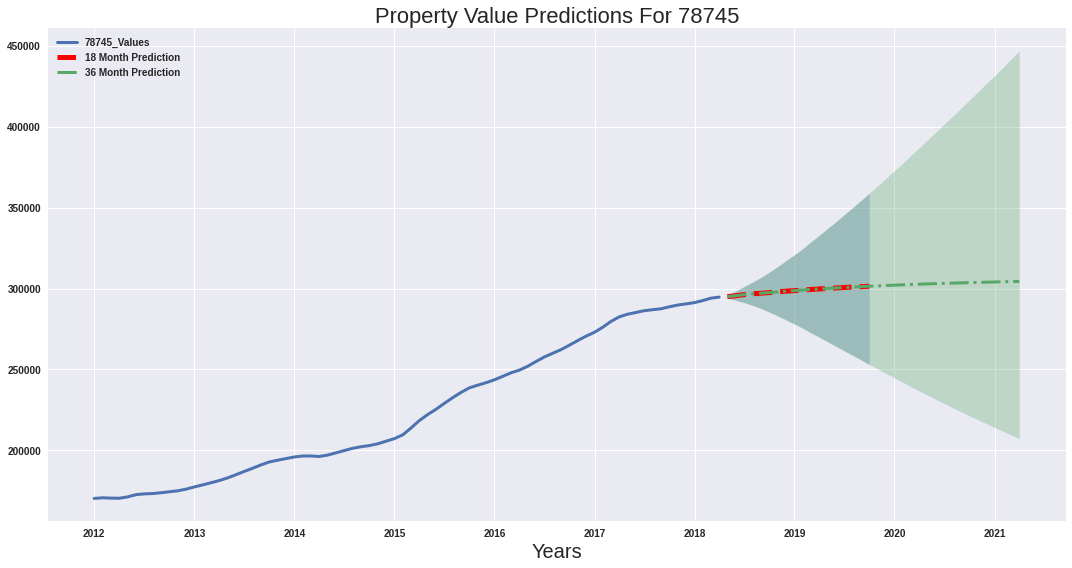

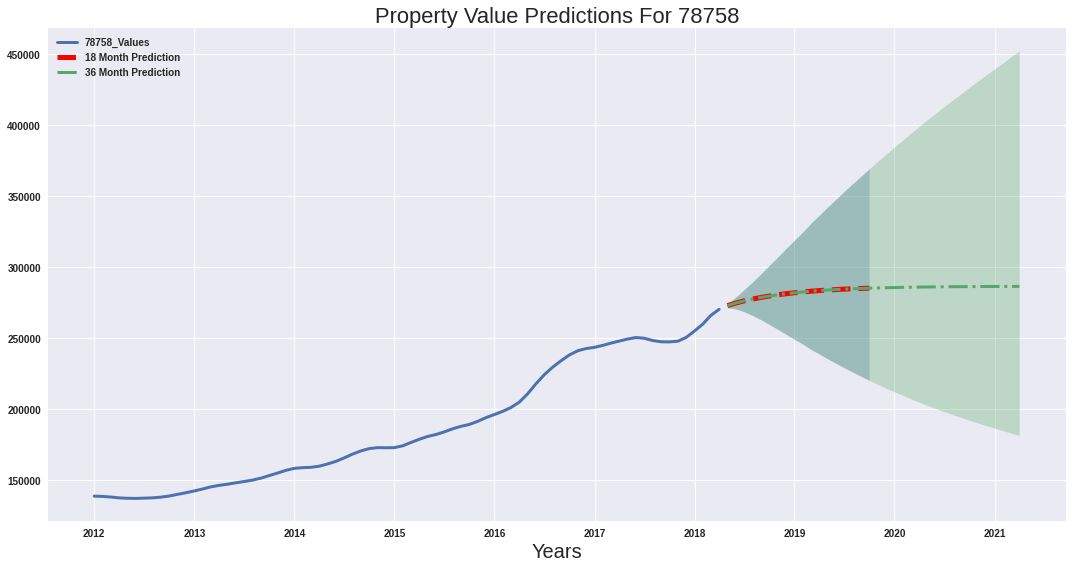

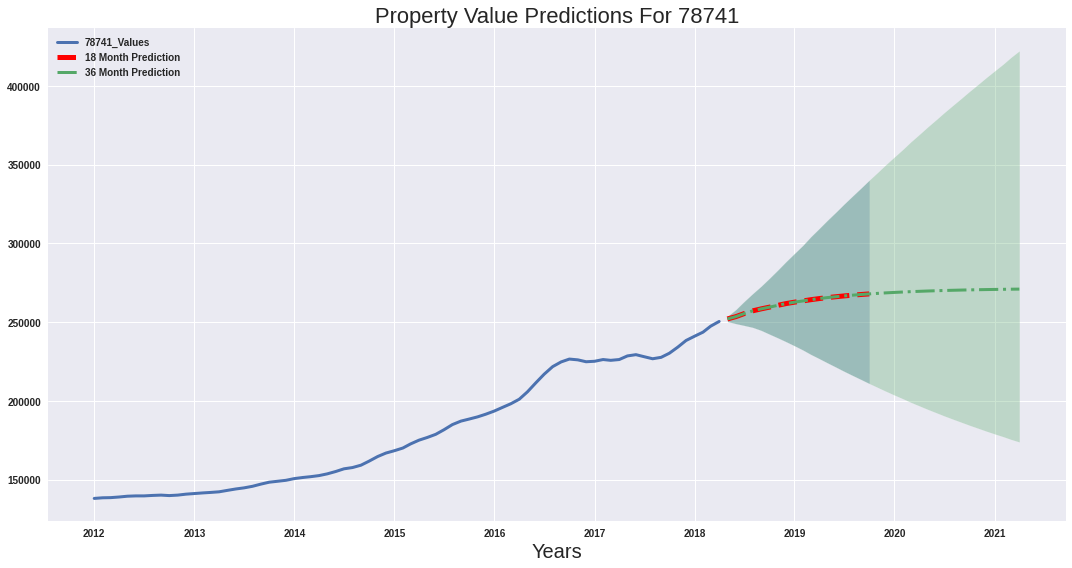

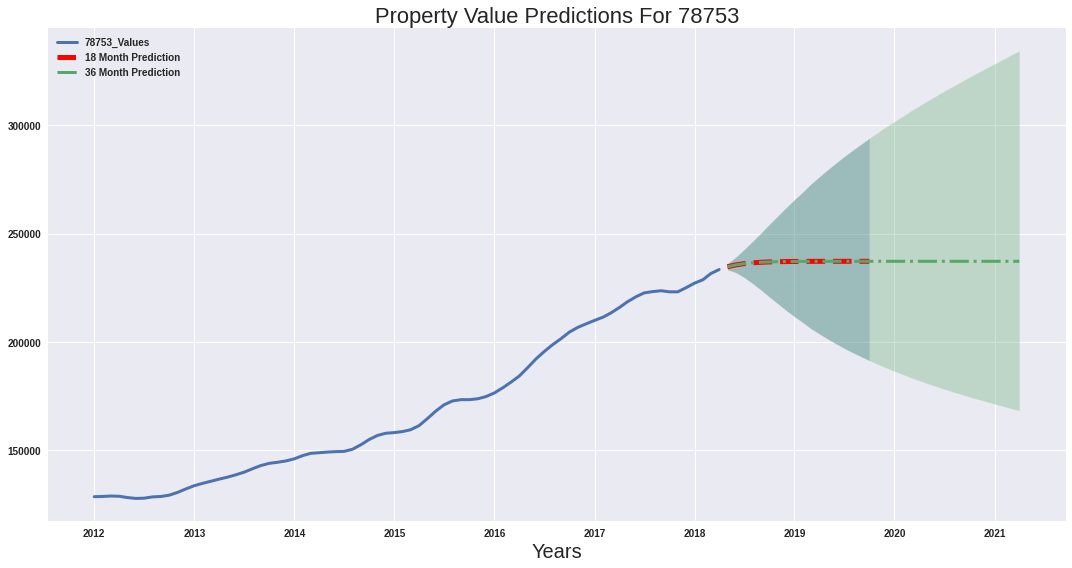

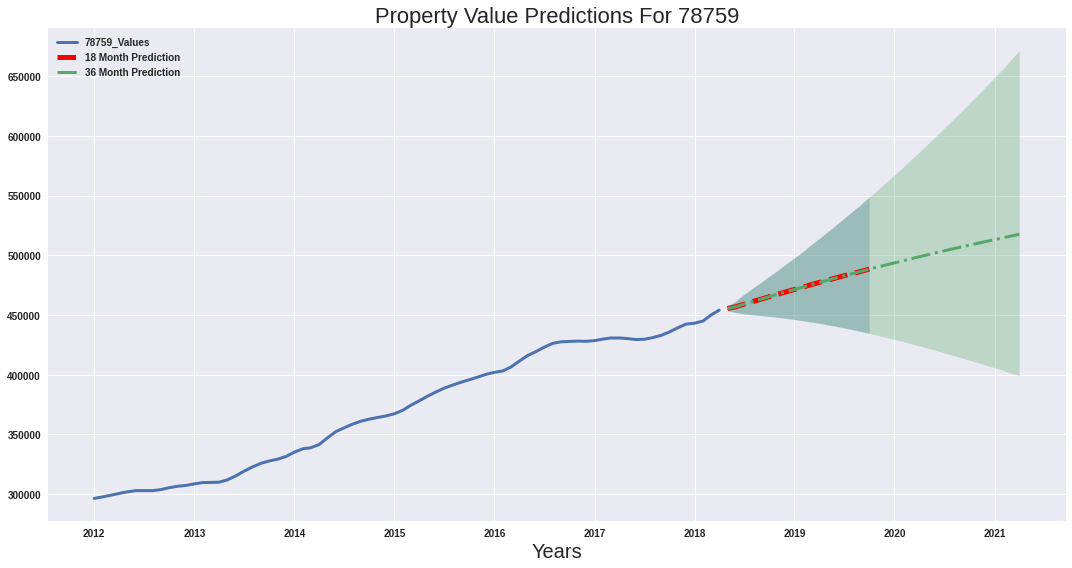

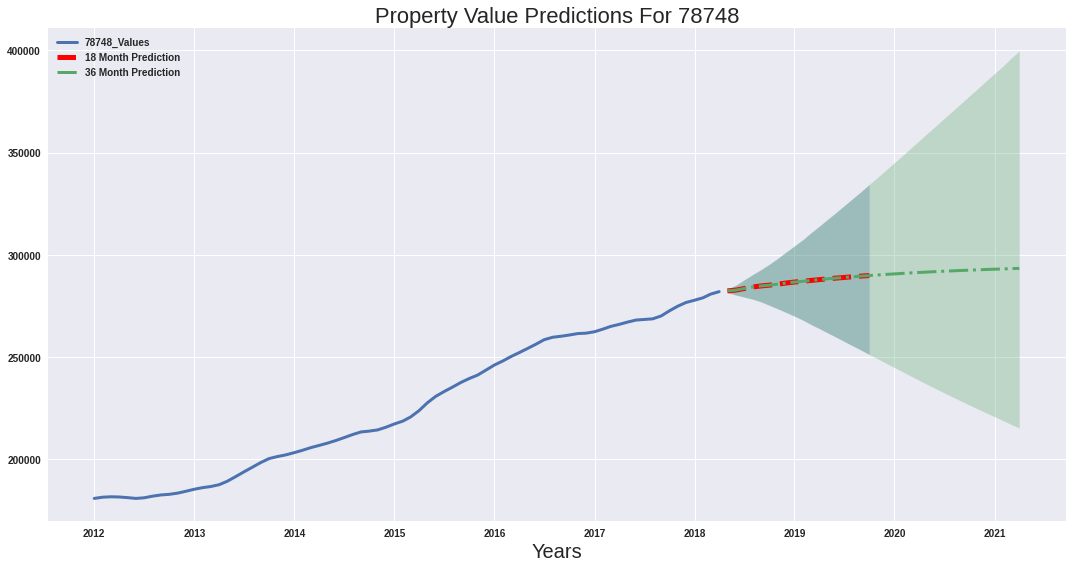

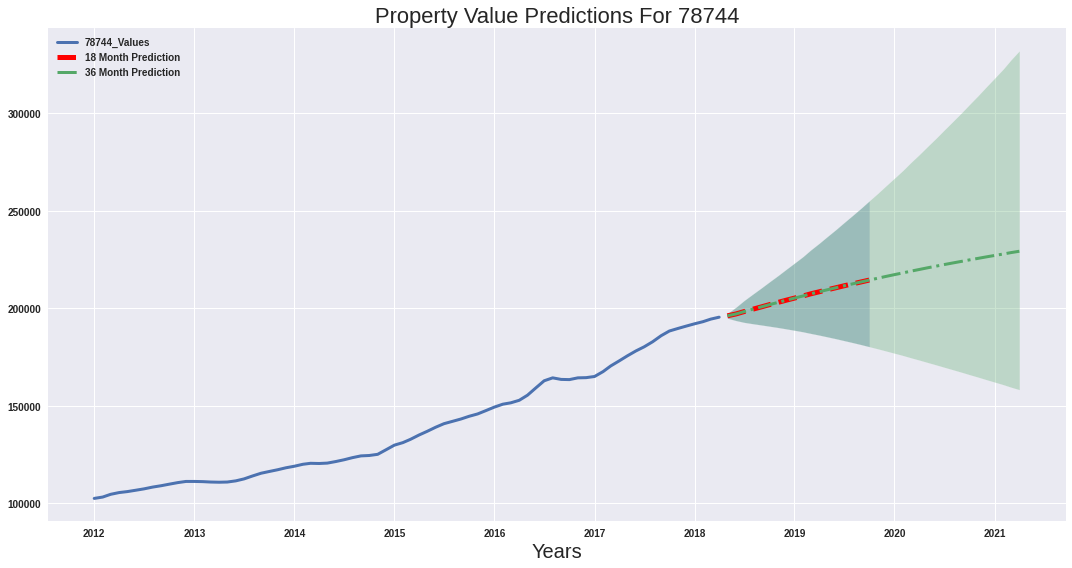

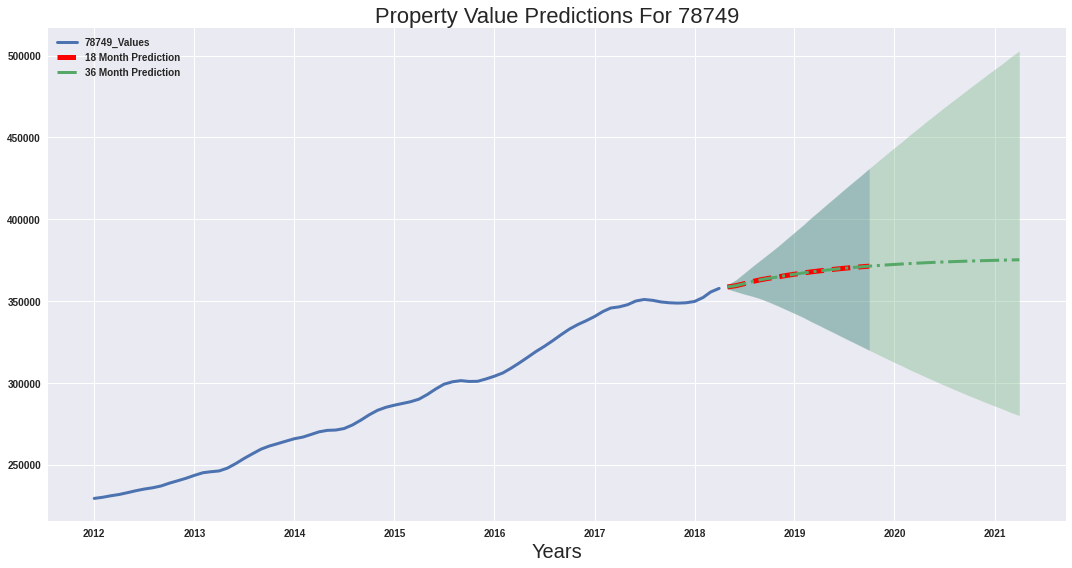

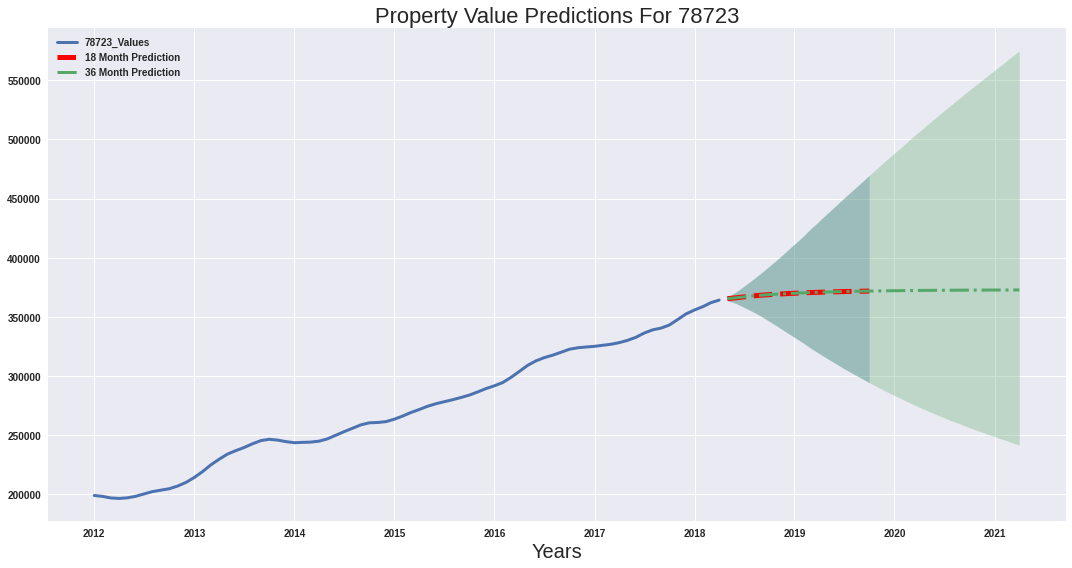

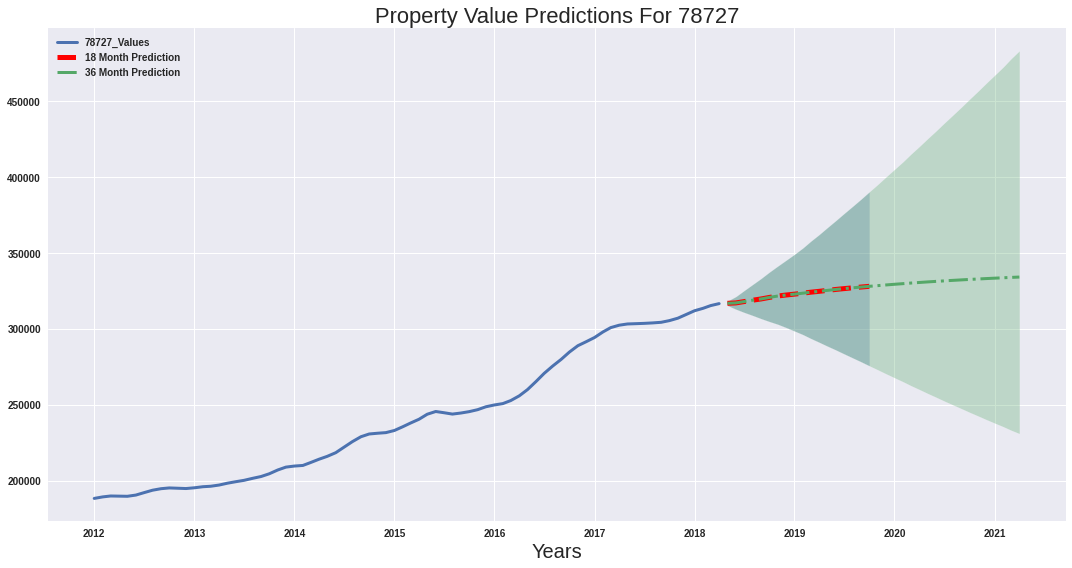

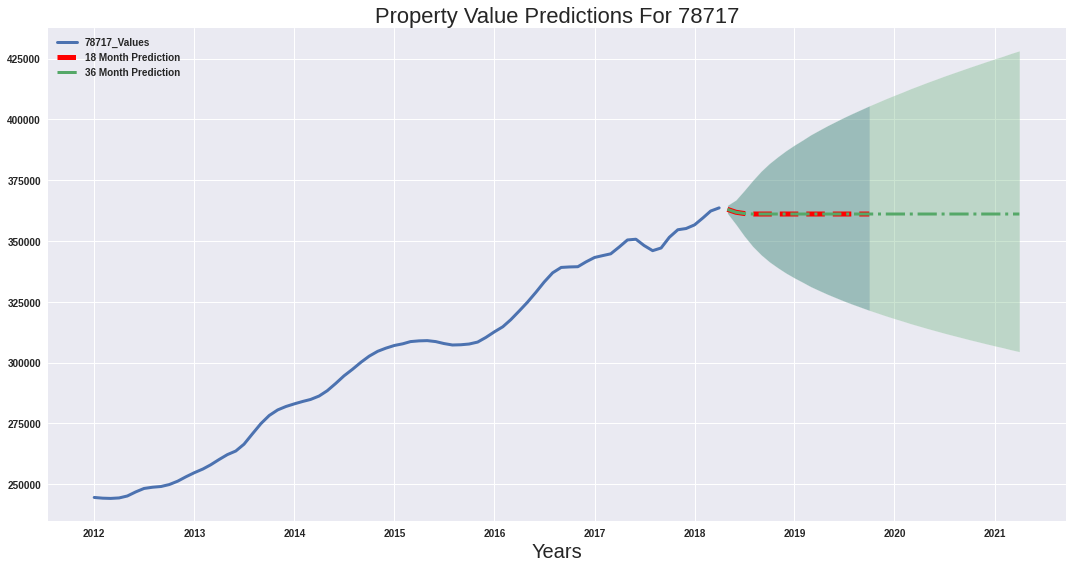

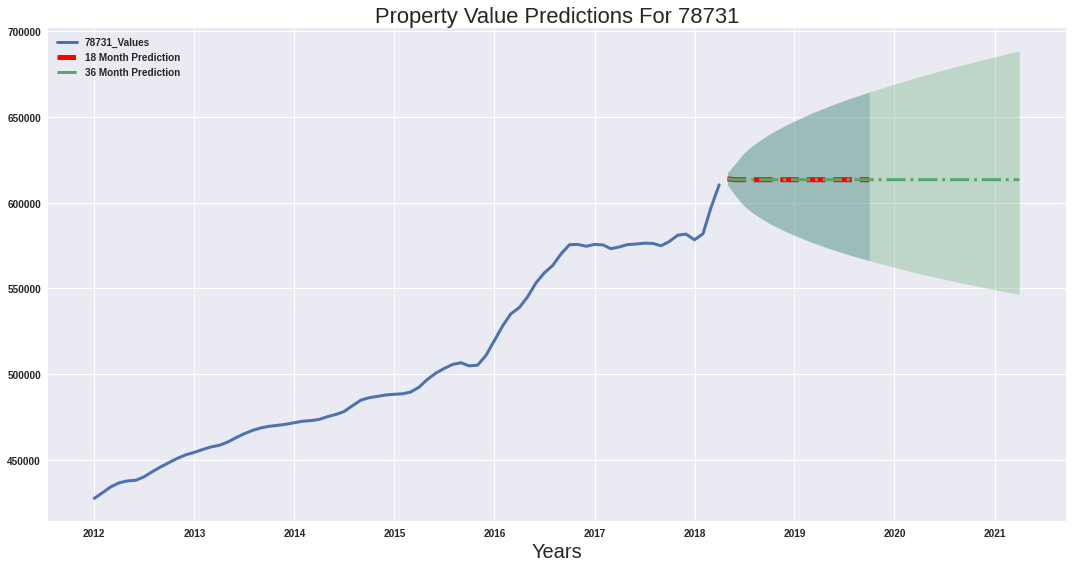

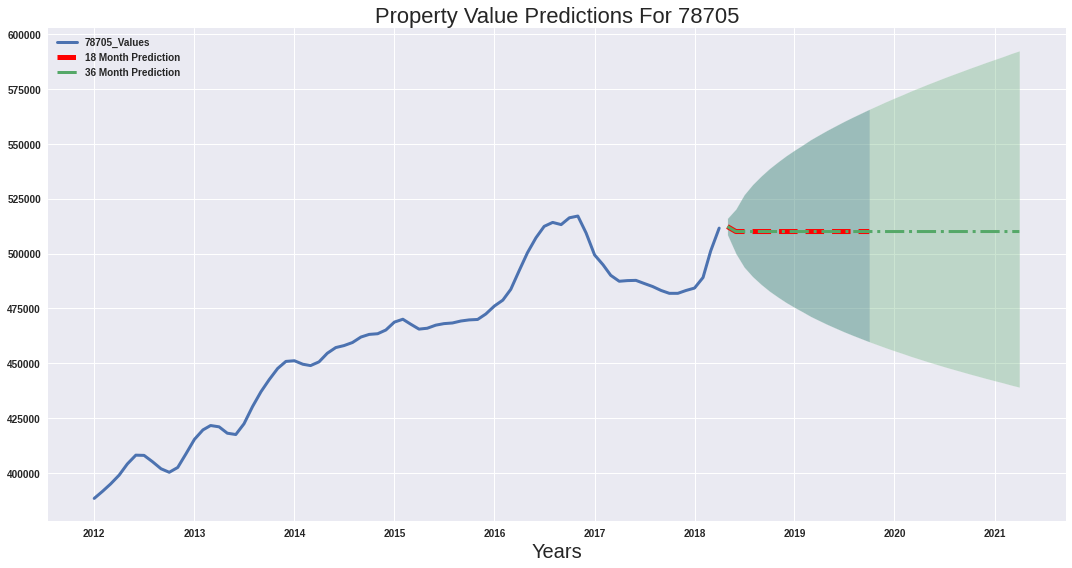

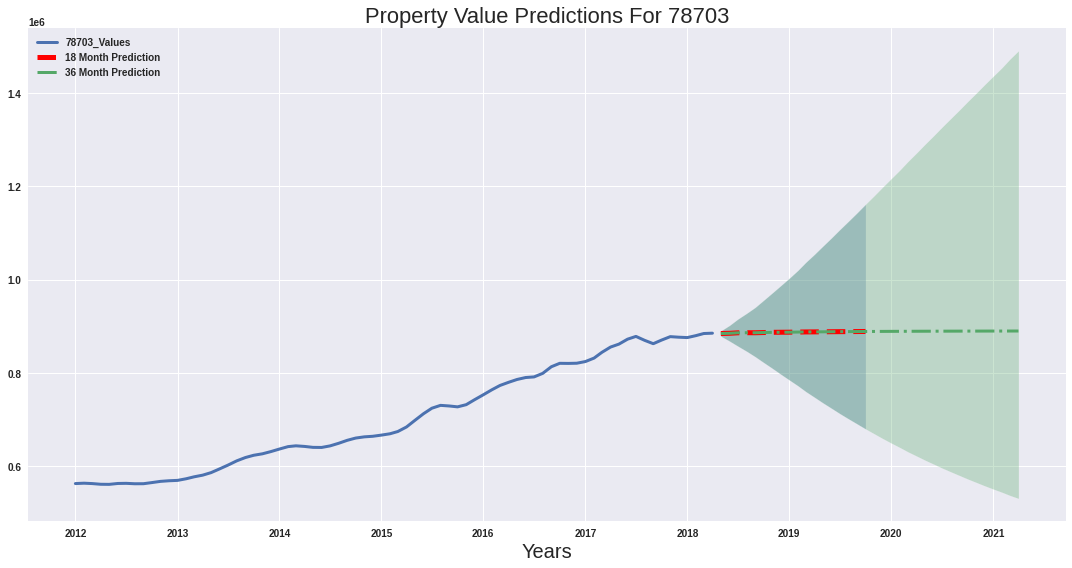

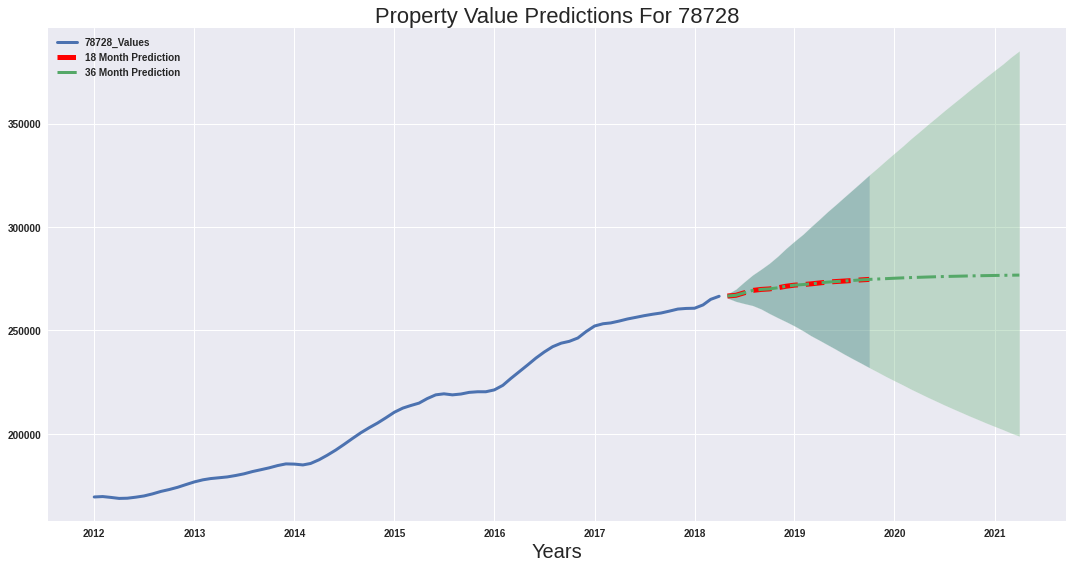

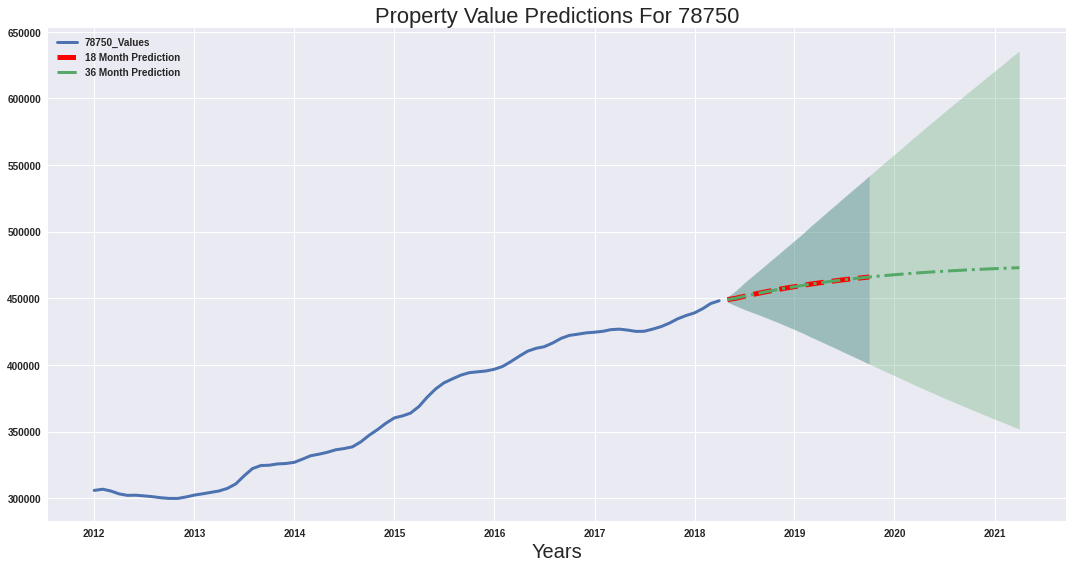

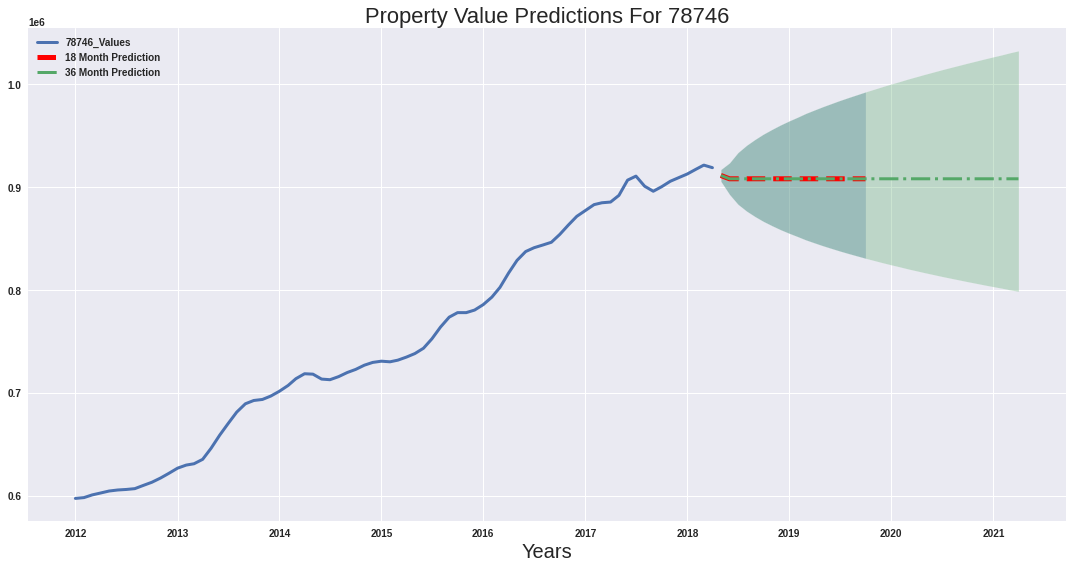

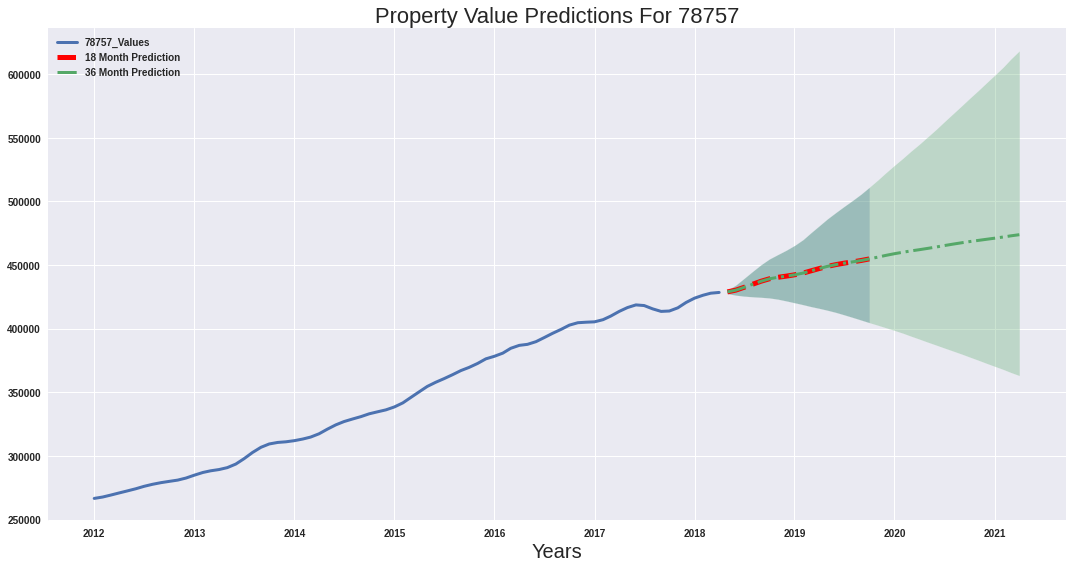

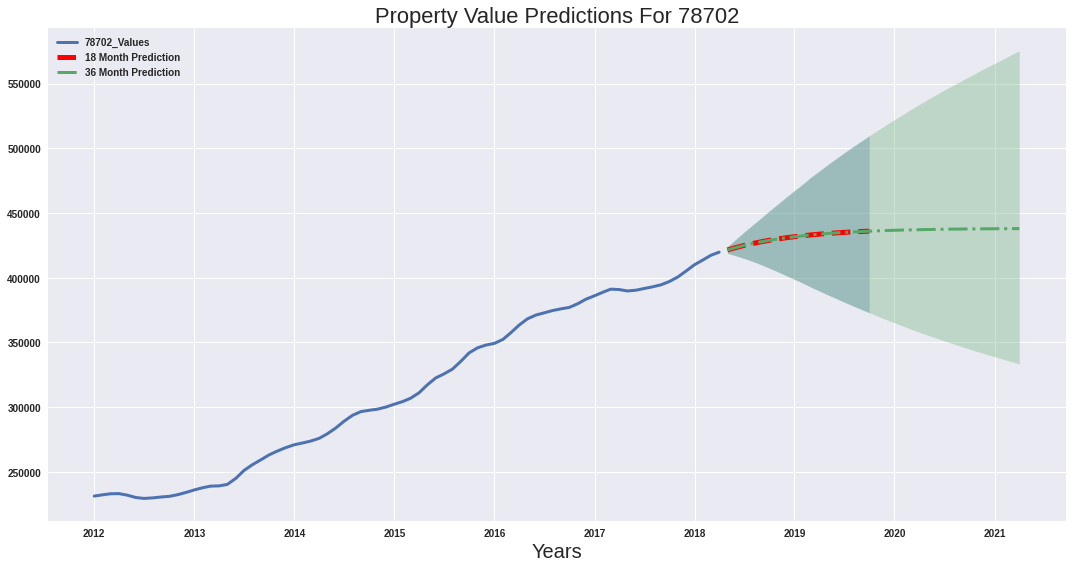

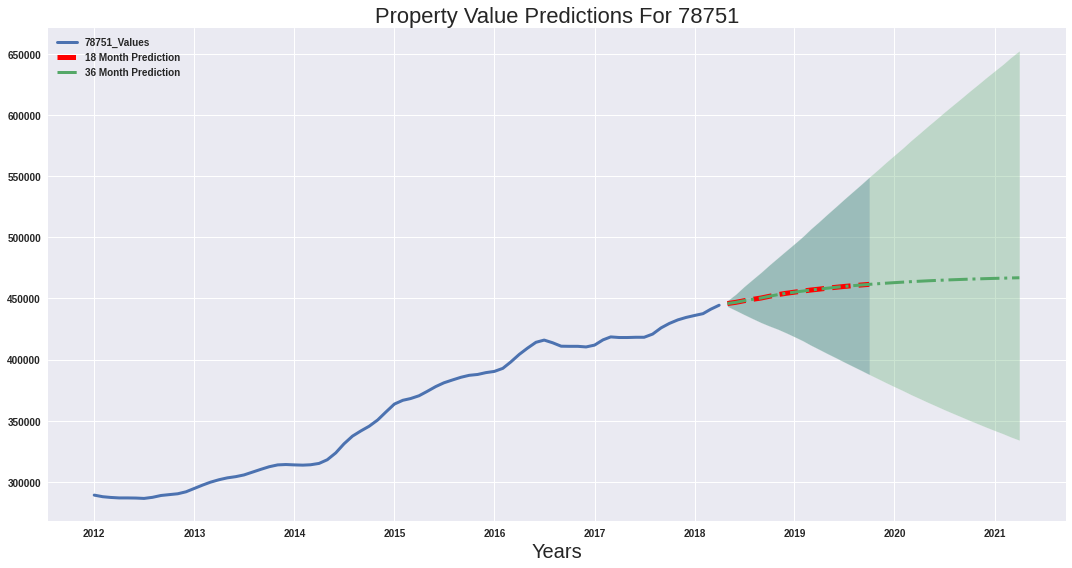

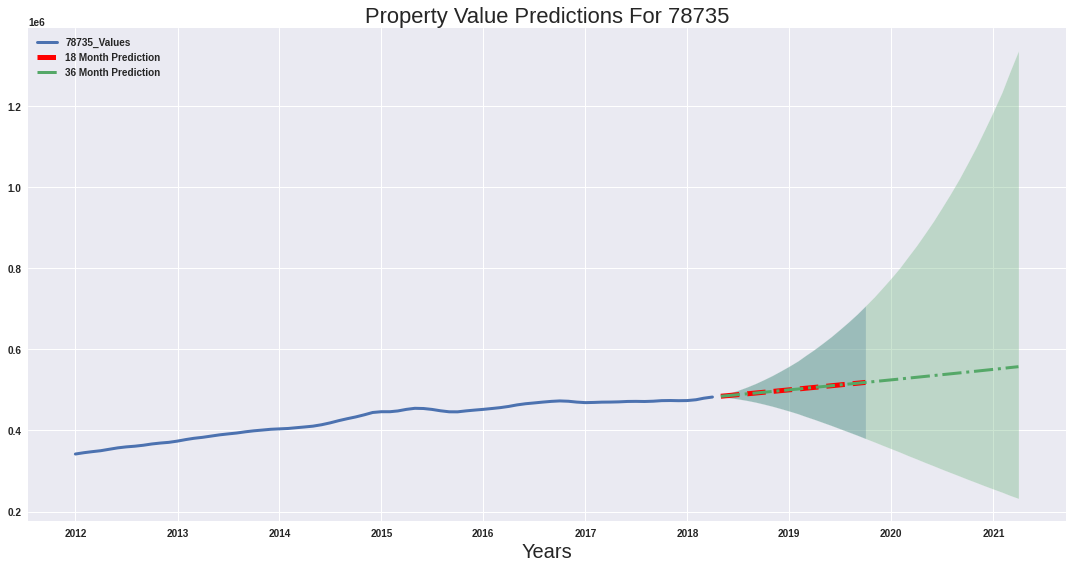

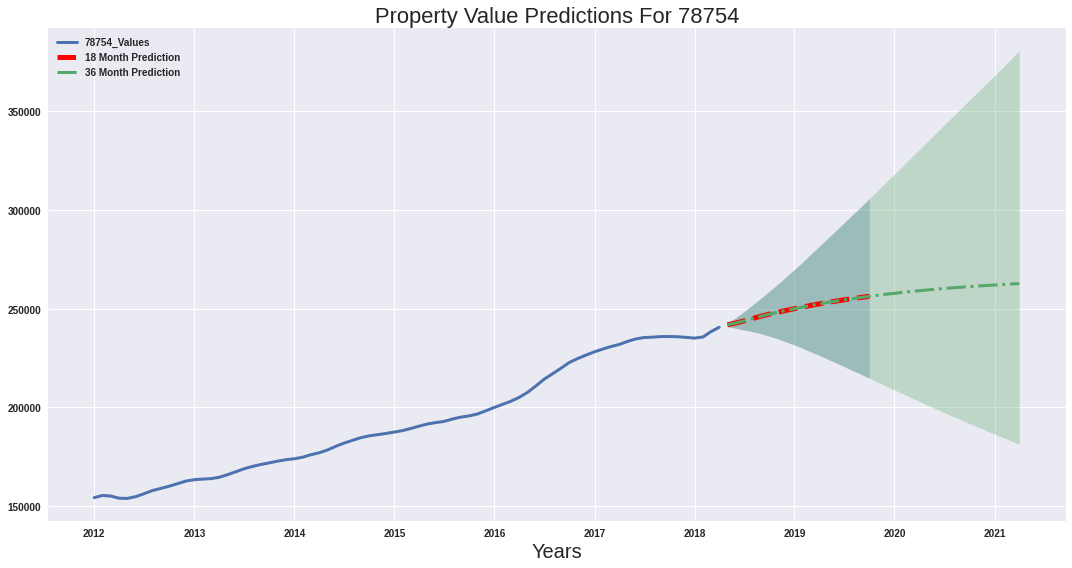

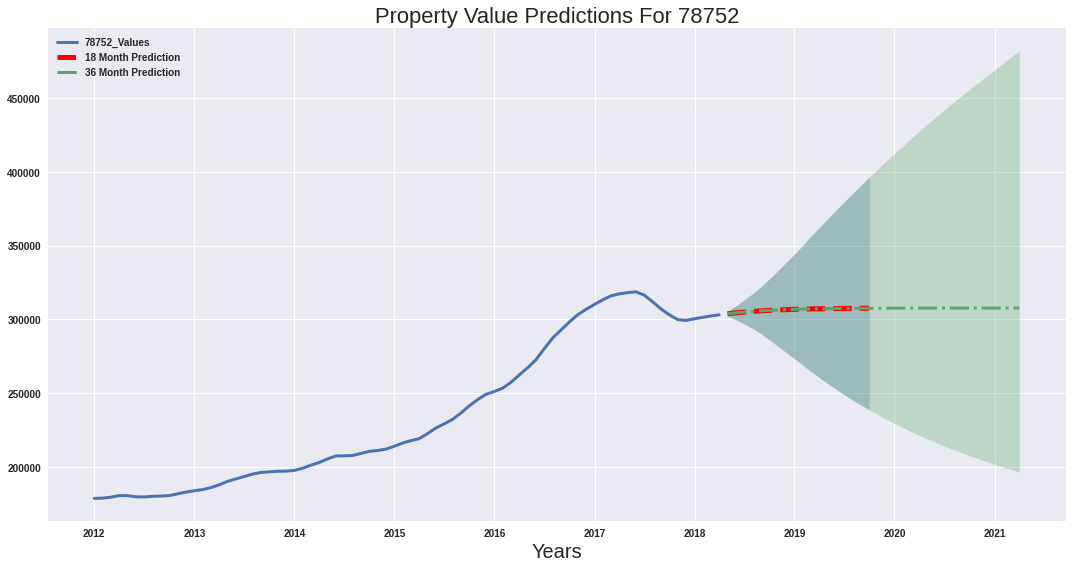

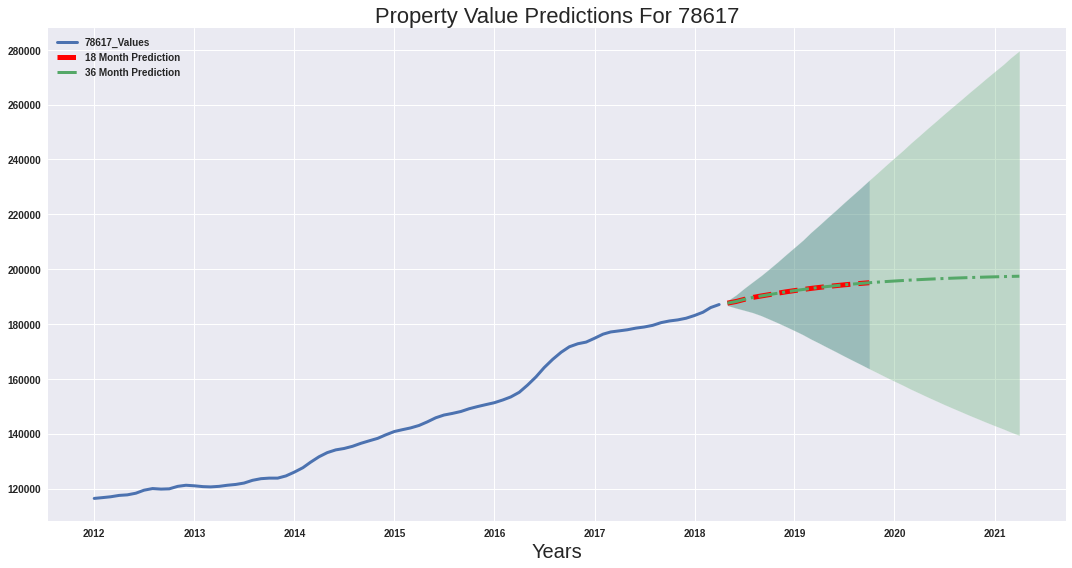

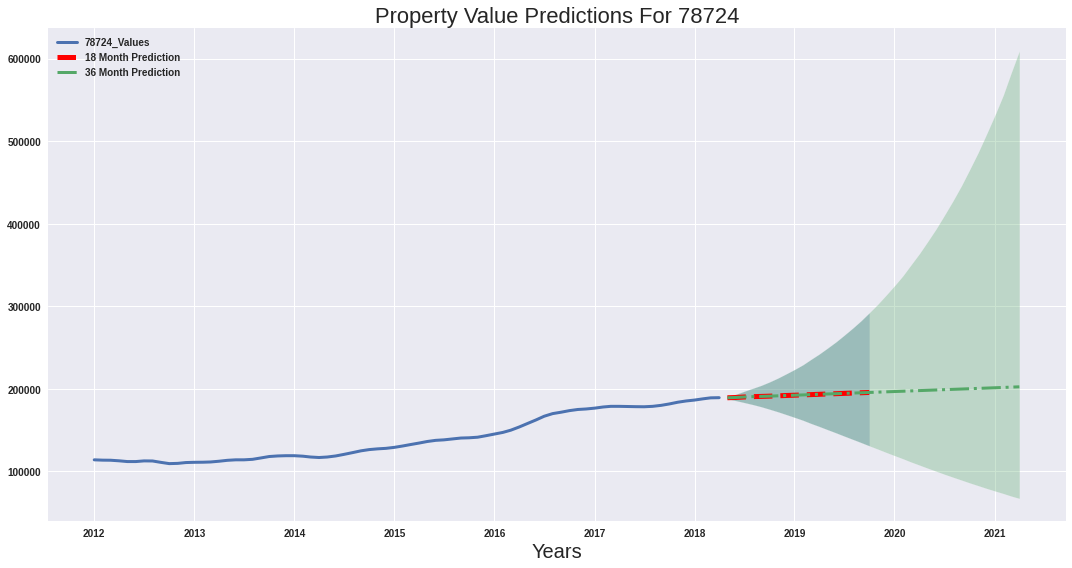

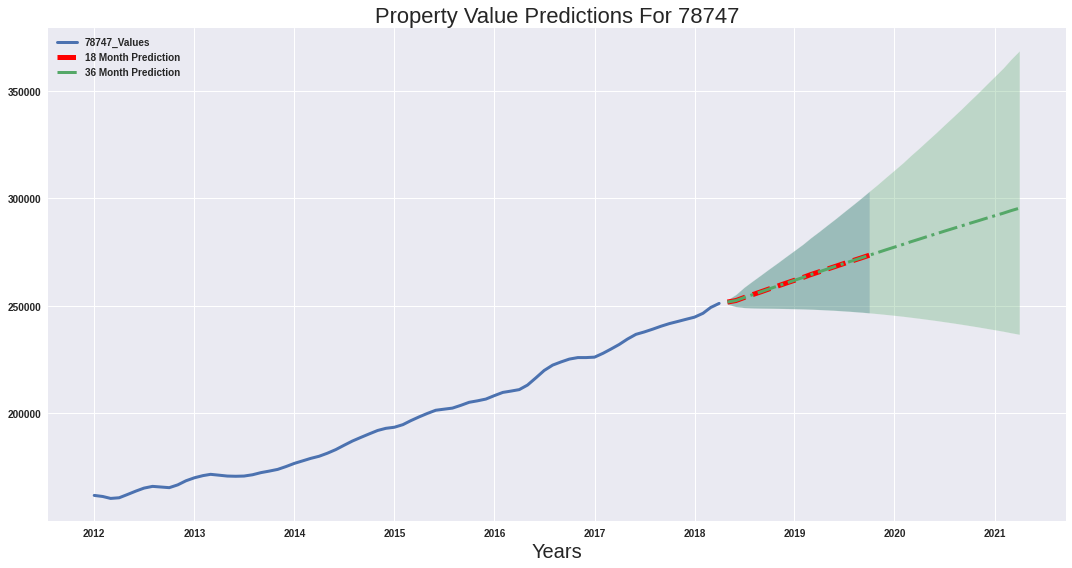

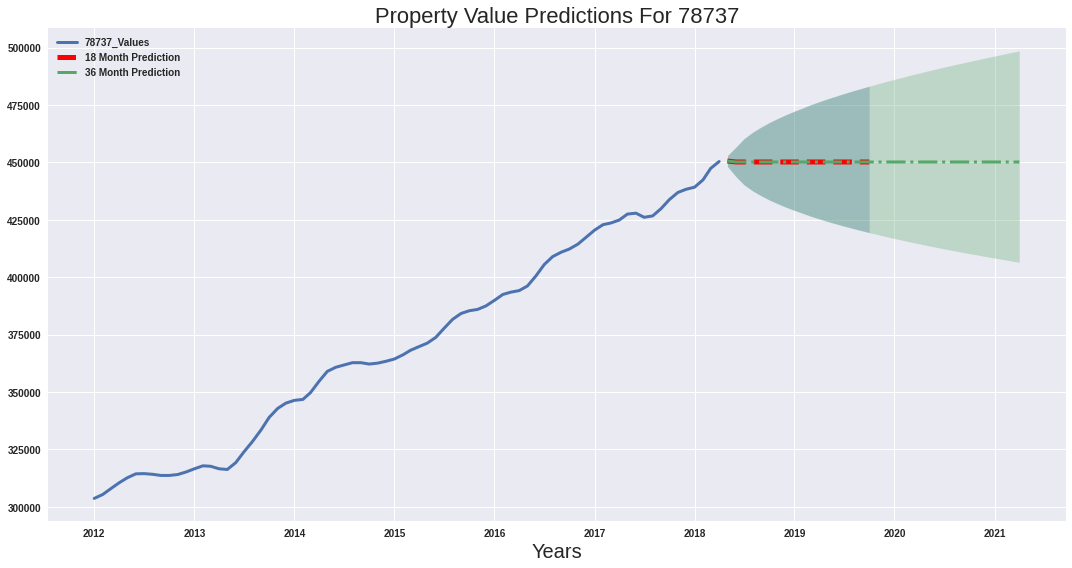

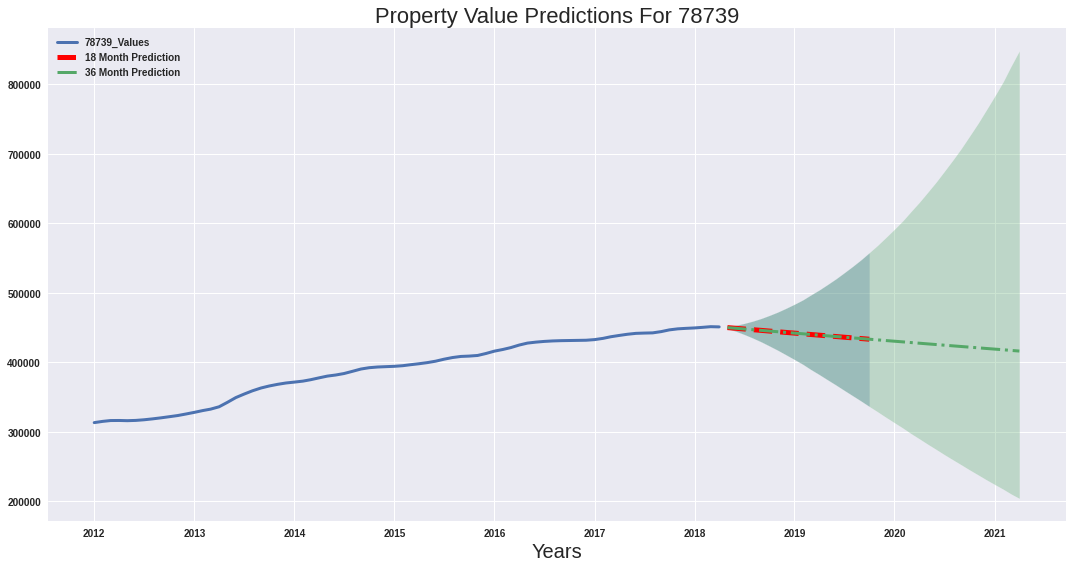

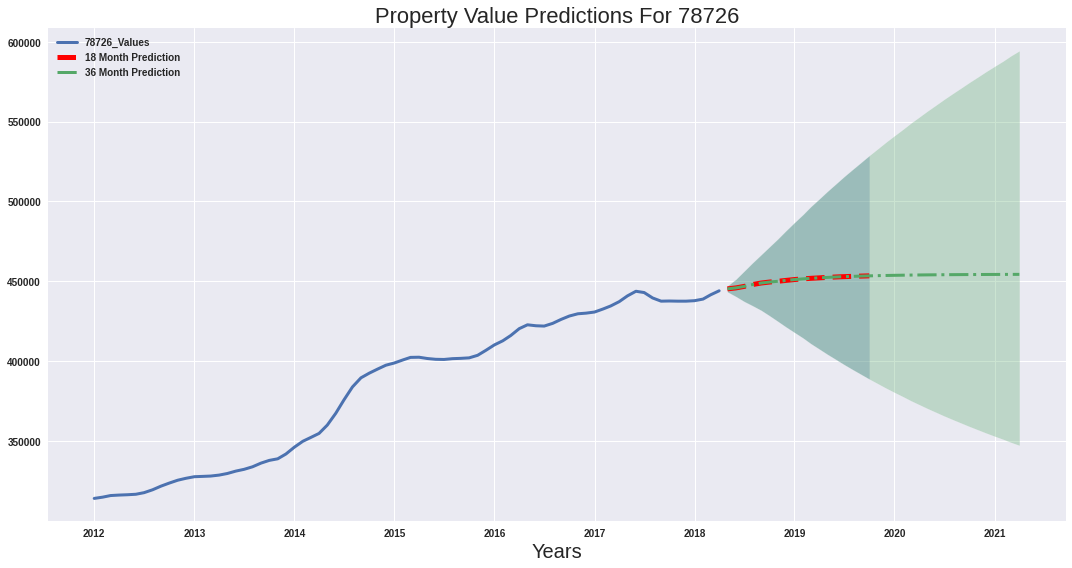

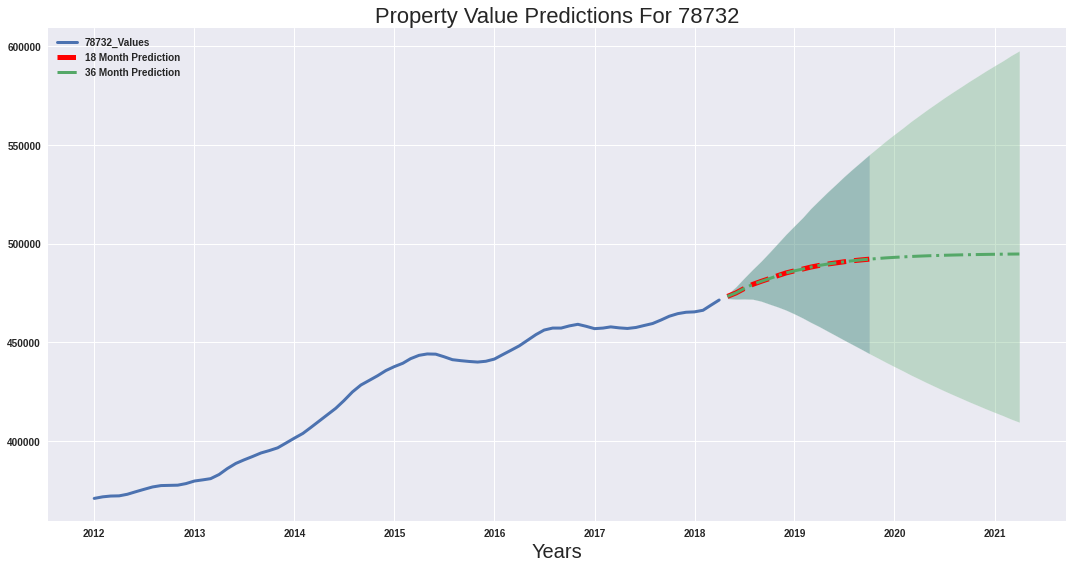

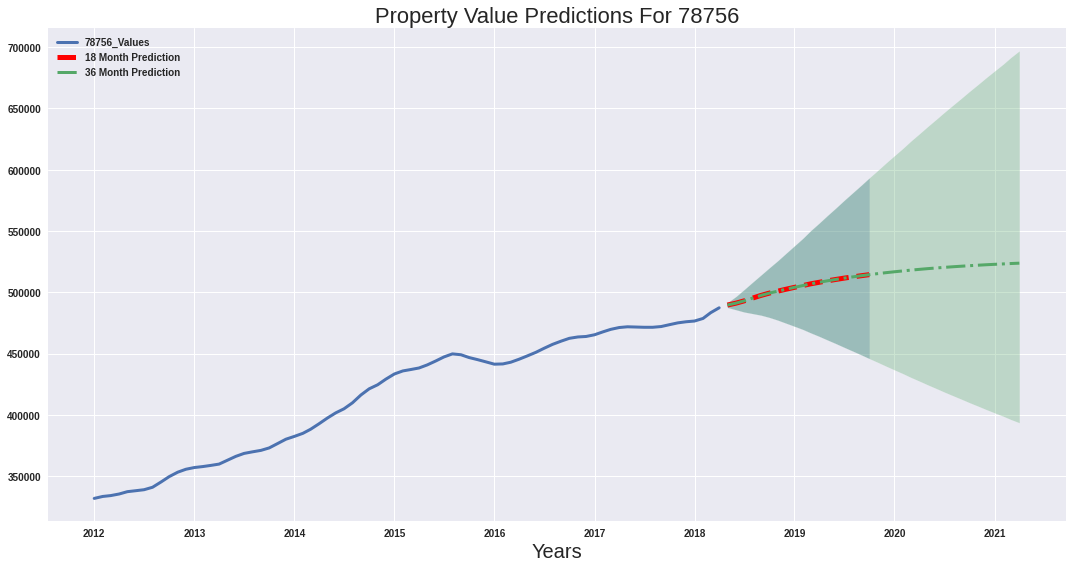

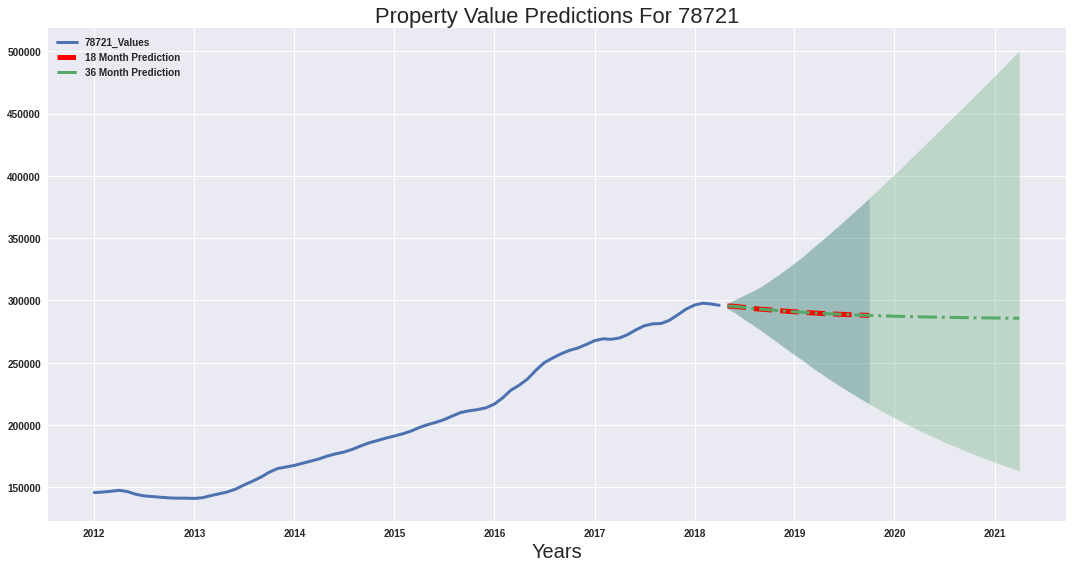

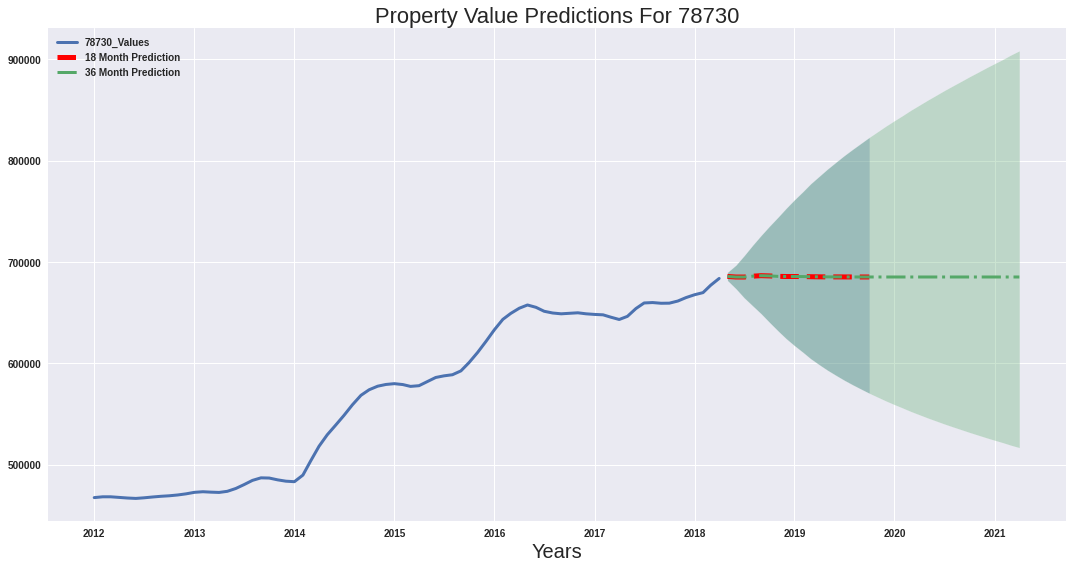

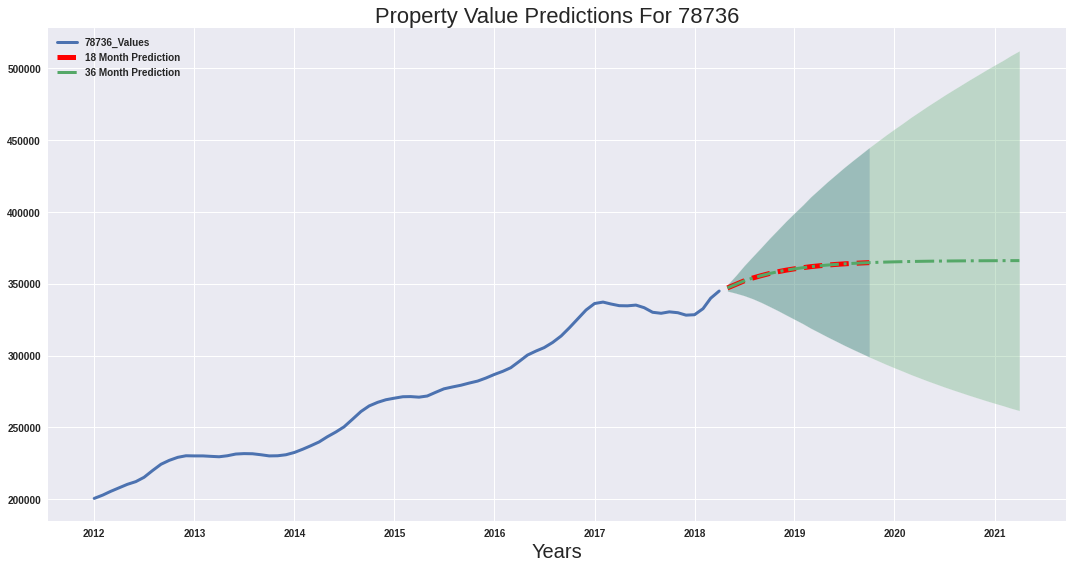

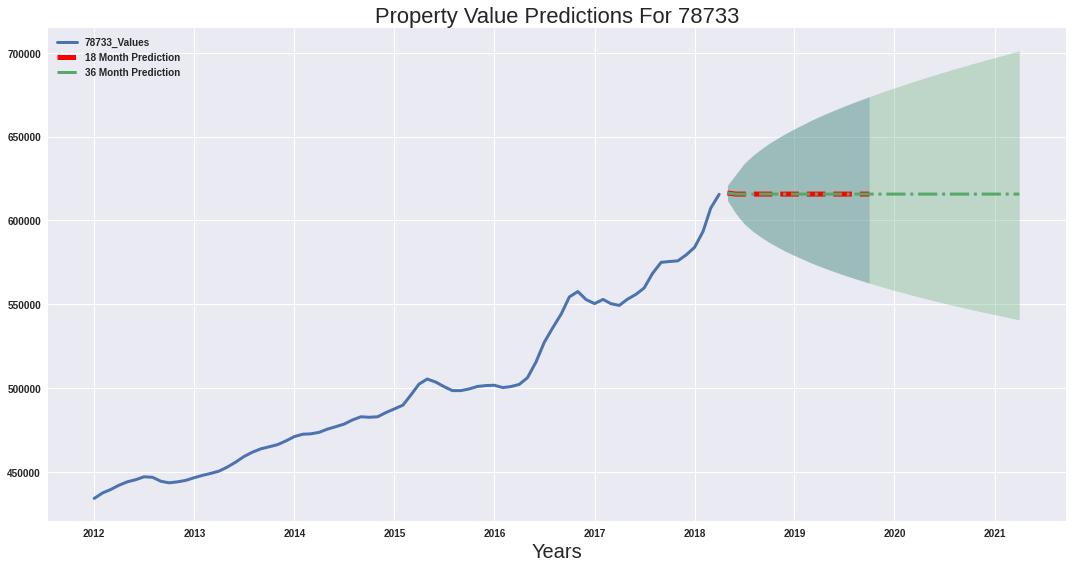

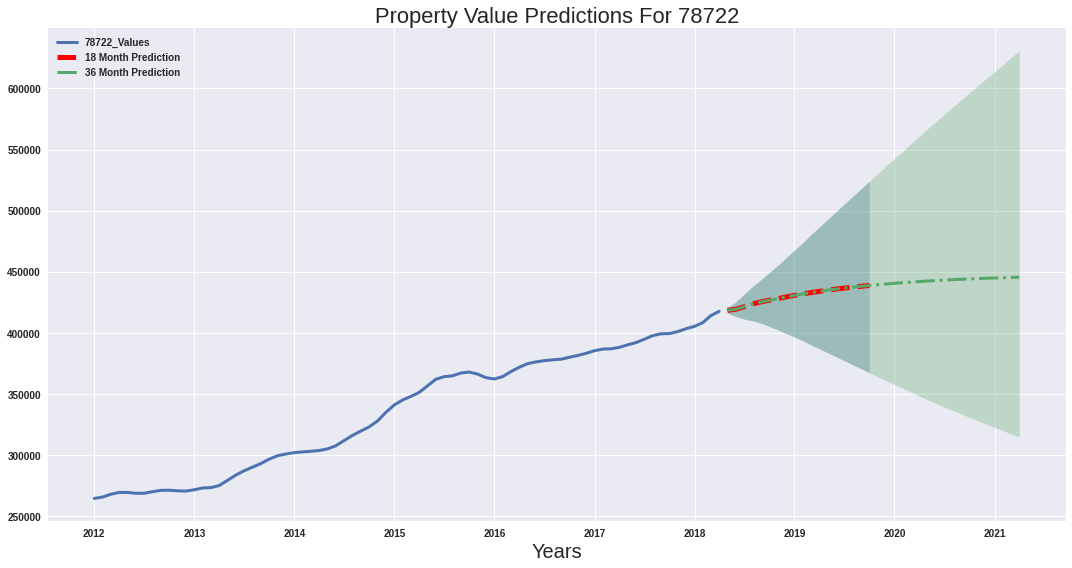

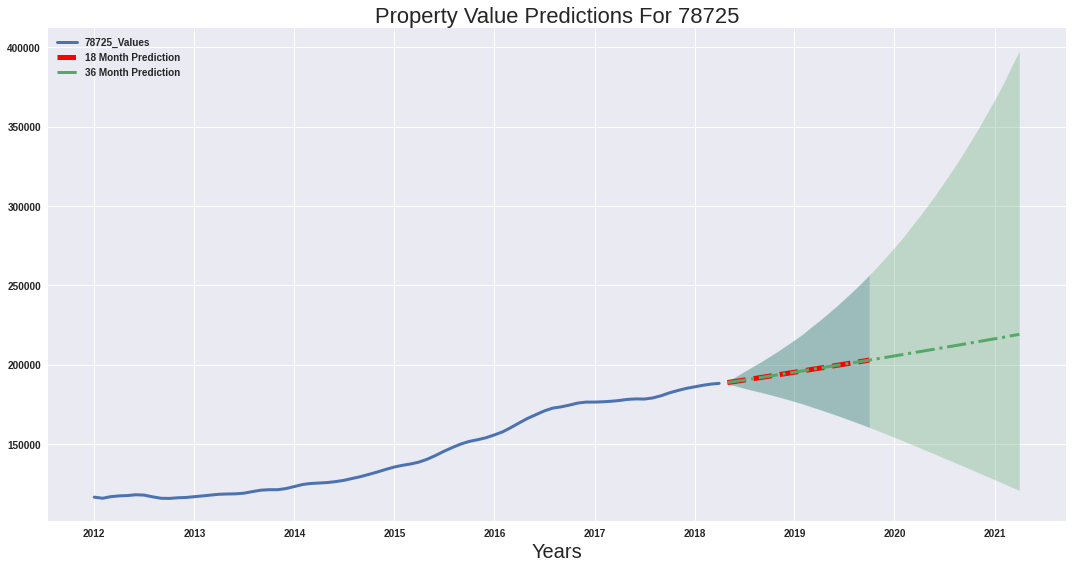

In [132]:
zipcode_list = list(austin_model['ZipCodes'].unique())
ts_last = []
mse_list = []
lower_list_18mo = []
upper_list_18mo = []
pred_list_18mo = []
roi_18mo = []
lower_list_36mo = []
upper_list_36mo = []
pred_list_36mo = []
roi_36mo = []
# best_parameters= []

for zipcode in zipcode_list:
    # print(zipcode)

    # Create Times Series For Each Zipcode
    zipcode_df = austin_model[austin_model['ZipCodes'] == zipcode]
    zipcode_ts = melt_data(zipcode_df.drop(['RegionID','SizeRank','ZipCodes'], axis=1))
    ts = zipcode_ts['2012':]
    ts = np.log(ts)
        
    # Get best params using auto_arima
    gridsearch_model = auto_arima(ts,start_p=0,start_q=0, random_state=12)
    best_model = SARIMAX(ts,
                         order=gridsearch_model.order,
                        seasonal_order=gridsearch_model.seasonal_order).fit()
    # best_parameters.append([gridsearch_model.order, 
    #                         gridsearch_model.seasonal_order, 
    #                         best_model.aic]) 
    # print('ARIMA {} x {}12: AIC CAlculated: {}'.format(gridsearch_model.order, 
                                                      #  gridsearch_model.seasonal_order, 
                                                      #  best_model.aic)) 

    # Calculating MSE
    pred = best_model.get_prediction(start=pd.to_datetime('2016-09-01'))
    pred_conf = pred.conf_int()
    # Forecast Test
    ts_forecasted = pred.predicted_mean
    ts_truth = ts['2016-09-01':]
    # Calculate MSE
    mse = mean_squared_error(ts_forecasted, ts_truth)
    mse_list.append(np.exp(mse))                                                 

    # Use the last price as BuyValue 
    ts_last.append(ts['value'][-1])

    
    #Create a dataframe for 18 months prediction
    pred_df_18 = forecast_to_df(best_model, steps=18)
    pred_df_18 = np.exp(pred_df_18)
    lower_list_18mo.append(pred_df_18['lower'][-1])
    upper_list_18mo.append(pred_df_18['upper'][-1])
    pred_list_18mo.append(pred_df_18['pred'][-1])
    roi_18mo.append((pred_df_18['pred'][-1]) - (np.exp(ts['value'][-1])))


    #Create a dataframe for 36 months prediction
    pred_df_36 = forecast_to_df(best_model, steps=36)
    pred_df_36 = np.exp(pred_df_36)
    lower_list_36mo.append(pred_df_36['lower'][-1])
    upper_list_36mo.append(pred_df_36['upper'][-1])
    pred_list_36mo.append(pred_df_36['pred'][-1])
    roi_36mo.append((pred_df_36['pred'][-1]) - (np.exp(ts['value'][-1])))

    plot_ts_pred(zipcode, np.exp(ts), pred_df_18, pred_df_36)


# Collect all the data into a new data frame
investment_table = pd.DataFrame({'ZipCode':zipcode_list,
                            'BuyValue':np.exp(ts_last),
                            'MSE': mse_list,
                            '18mo_lower':lower_list_18mo,
                            '18mo_upper':upper_list_18mo,
                            '18mo_pred':pred_list_18mo,
                            '18mo_ROI':roi_18mo,
                            '36mo_lower':lower_list_36mo,
                            '36mo_upper':upper_list_36mo,
                            '36mo_pred':pred_list_36mo,
                            '36mo_ROI':roi_36mo,})

In [133]:
investment_table

ZipCode  BuyValue       MSE  ...    36mo_upper      36mo_pred      36mo_ROI
0    78704  550900.0  1.000004  ...  7.945283e+05  600658.422236  49758.422236
1    78745  294700.0  1.000002  ...  4.467705e+05  304359.994164   9659.994164
2    78758  270400.0  1.000010  ...  4.525931e+05  286538.919717  16138.919717
3    78741  250400.0  1.000024  ...  4.222954e+05  270939.237597  20539.237597
4    78753  233400.0  1.000011  ...  3.343998e+05  237189.122768   3789.122768
5    78759  454100.0  1.000004  ...  6.714023e+05  517663.467032  63563.467032
6    78748  282000.0  1.000002  ...  3.997642e+05  293368.335698  11368.335698
7    78744  195500.0  1.000009  ...  3.320476e+05  229290.305500  33790.305500
8    78749  357700.0  1.000003  ...  5.029510e+05  375190.555138  17490.555138
9    78723  364200.0  1.000004  ...  5.749536e+05  372745.000337   8545.000337
10   78727  316500.0  1.000004  ...  4.828839e+05  333976.311918  17476.311918
11   78717  363600.0  1.000010  ...  4.282062e+05  361071.119416  -2528.880584
12   78731  610500.0  1.000018  ...  6.887377e+05  613463.634690   2963.634690
13   78705  511600.0  1.000028  ...  5.923612e+05  510043.942510  -1556.057490
14   78703  885300.0  1.000018  ...  1.489779e+06  889936.203362   4636.203362
15   78728  266500.0  1.000004  ...  3.852461e+05  276735.103617  10235.103617
16   78750  448200.0  1.000002  ...  6.357300e+05  473008.975032  24808.975032
17   78746  918700.0  1.000016  ...  1.032347e+06  907912.505410 -10787.494590
18   78757  428500.0  1.000004  ...  6.184438e+05  473894.906971  45394.906971
19   78702  419800.0  1.000005  ...  5.754057e+05  437998.168109  18198.168109
20   78751  444500.0  1.000009  ...  6.524380e+05  466934.804582  22434.804582
21   78735  482200.0  1.000003  ...  1.335719e+06  557005.612004  74805.612004
22   78754  240600.0  1.000005  ...  3.806657e+05  262724.778154  22124.778154
23   78752  303100.0  1.000011  ...  4.821249e+05  307666.031840   4566.031840
24   78617  187100.0  1.000005  ...  2.796260e+05  197422.684143  10322.684143
25   78724  189300.0  1.000007  ...  6.095807e+05  202458.826822  13158.826822
26   78747  251200.0  1.000004  ...  3.686781e+05  295468.350166  44268.350166
27   78737  450400.0  1.000006  ...  4.986038e+05  450189.425992   -210.574008
28   78739  451000.0  1.000001  ...  8.481354e+05  416249.624547 -34750.375453
29   78726  444100.0  1.000005  ...  5.943643e+05  454376.796581  10276.796581
30   78732  471500.0  1.000002  ...  5.976081e+05  494778.229100  23278.229100
31   78756  487400.0  1.000002  ...  6.970429e+05  523792.917256  36392.917256
32   78721  296100.0  1.000014  ...  5.003710e+05  285699.895969 -10400.104031
33   78730  683700.0  1.000010  ...  9.082562e+05  685116.223514   1416.223514
34   78736  344900.0  1.000018  ...  5.121684e+05  366076.752986  21176.752986
35   78733  615600.0  1.000030  ...  7.011945e+05  615718.541588    118.541588
36   78722  417500.0  1.000005  ...  6.308748e+05  445479.241682  27979.241682
37   78725  188200.0  1.000005  ...  3.977652e+05  219083.603519  30883.603519

[38 rows x 11 columns]

In [134]:
# Save the dataframe as predictions.csv
investment_table.to_csv('predictions.csv')

## RECOMMENDATIONS

### Objectives

*   Determine the predictors for the best investment options.
*   Analyze these predictors for eacinvestment term.



In [135]:
df = pd.read_csv('/content/predictions.csv').drop('Unnamed: 0', axis=1)
df.head()

ZipCode  BuyValue       MSE  ...     36mo_upper      36mo_pred      36mo_ROI
0    78704  550900.0  1.000004  ...  794528.305677  600658.422236  49758.422236
1    78745  294700.0  1.000002  ...  446770.495662  304359.994164   9659.994164
2    78758  270400.0  1.000010  ...  452593.077164  286538.919717  16138.919717
3    78741  250400.0  1.000024  ...  422295.363624  270939.237597  20539.237597
4    78753  233400.0  1.000011  ...  334399.824120  237189.122768   3789.122768

[5 rows x 11 columns]

Calculate ROI percentage for the each investment term to see which zipcodes have the highest return on investment percentage.

> *ROI(%) =* $ \frac {RETURN~ON~INVESTMENT}{COST~OF~INVESTMENT} *100$ 

Calculate risk factor for each zipcode using lower confidence interval.

> *Risk(%) =* $ \frac {COST~OF~INVESTMENT~-~LOWER~PREDICTION}{COST~OF~INVESTMENT} *100$

We are looking to maximize ***ROI*** while minimizinf *Risk*.


In [137]:
# Calculate ROI percentage for each zipcode for 18 months and 36 months.
df['18mo_roi_per'] = np.NaN
df['36mo_roi_per'] = np.NaN
df['18mo_risk'] = np.NaN
df['36mo_risk'] = np.NaN

for i in range(len(df)):
    df['18mo_roi_per'][i] = round(((df['18mo_ROI'][i] / df['BuyValue'][i]) * 100), 2)
    df['36mo_roi_per'][i] = round(((df['36mo_ROI'][i] / df['BuyValue'][i]) * 100), 2)
    df['18mo_risk'][i] = round((((df['BuyValue'][i] - df['18mo_lower'][i]) / df['BuyValue'][i]) * 100), 2)
    df['36mo_risk'][i] = round((((df['BuyValue'][i] - df['36mo_lower'][i]) / df['BuyValue'][i]) * 100), 2)
df

ZipCode  BuyValue       MSE  ...  36mo_roi_per  18mo_risk  36mo_risk
0     78704  550900.0  1.000004  ...          9.03       6.74      17.57
1     78745  294700.0  1.000002  ...          3.28      14.12      29.64
2     78758  270400.0  1.000010  ...          5.97      18.55      32.91
3     78741  250400.0  1.000024  ...          8.20      15.76      30.58
4     78753  233400.0  1.000011  ...          1.62      18.02      27.92
5     78759  454100.0  1.000004  ...         14.00       4.29      12.11
6     78748  282000.0  1.000002  ...          4.03      10.91      23.66
7     78744  195500.0  1.000009  ...         17.28       7.75      19.01
8     78749  357700.0  1.000003  ...          4.89      10.59      21.75
9     78723  364200.0  1.000004  ...          2.35      19.19      33.65
10    78727  316500.0  1.000004  ...          5.52      12.93      27.02
11    78717  363600.0  1.000010  ...         -0.70      11.59      16.26
12    78731  610500.0  1.000018  ...          0.49       7.26      10.50
13    78705  511600.0  1.000028  ...         -0.30      10.12      14.16
14    78703  885300.0  1.000018  ...          0.52      23.14      39.95
15    78728  266500.0  1.000004  ...          3.84      12.97      25.41
16    78750  448200.0  1.000002  ...          5.54      10.61      21.48
17    78746  918700.0  1.000016  ...         -1.17       9.59      13.09
18    78757  428500.0  1.000004  ...         10.59       5.55      15.26
19    78702  419800.0  1.000005  ...          4.33      11.17      20.58
20    78751  444500.0  1.000009  ...          5.05      12.74      24.82
21    78735  482200.0  1.000003  ...         15.51      21.22      51.83
22    78754  240600.0  1.000005  ...          9.20      10.74      24.64
23    78752  303100.0  1.000011  ...          1.51      21.30      35.22
24    78617  187100.0  1.000005  ...          5.52      12.53      25.50
25    78724  189300.0  1.000007  ...          6.95      30.84      64.48
26    78747  251200.0  1.000004  ...         17.62       1.76       5.73
27    78737  450400.0  1.000006  ...         -0.05       6.88       9.75
28    78739  451000.0  1.000001  ...         -7.71      25.38      54.70
29    78726  444100.0  1.000005  ...          2.31      12.44      21.78
30    78732  471500.0  1.000002  ...          4.94       5.75      13.12
31    78756  487400.0  1.000002  ...          7.47       8.50      19.24
32    78721  296100.0  1.000014  ...         -3.51      26.75      44.91
33    78730  683700.0  1.000010  ...          0.21      16.57      24.41
34    78736  344900.0  1.000018  ...          6.14      13.32      24.14
35    78733  615600.0  1.000030  ...          0.02       8.61      12.17
36    78722  417500.0  1.000005  ...          6.70      12.05      24.65
37    78725  188200.0  1.000005  ...         16.41      14.77      35.88

[38 rows x 15 columns]

The standard deviation of Mean Squared Error value is very small to be significant so we will make our recommendations based on other variables. We observe from the dataframe above, ROI percentages and risks are different for short term (18 months) and long term (36 months) investments. Let's check data for each investment term to determine predictor boundries.

#### 18-Month Investment 

For our company we will recommend zipcodes with maximum 10% risk factor with at least 1% return on investment annually for 18 month period. We also want our return on investment percentage higher or equal to risk factor.

In [218]:
df_18 = df[(df['18mo_roi_per'] >= 1.5)& (df['18mo_risk'] <= 10) & (df['18mo_roi_per']/df['18mo_risk']) >=1].sort_values(by = '18mo_roi_per', ascending=False)
df_18.head()

ZipCode  BuyValue       MSE  ...  36mo_roi_per  18mo_risk  36mo_risk
7     78744  195500.0  1.000009  ...         17.28       7.75      19.01
26    78747  251200.0  1.000004  ...         17.62       1.76       5.73
5     78759  454100.0  1.000004  ...         14.00       4.29      12.11
18    78757  428500.0  1.000004  ...         10.59       5.55      15.26
0     78704  550900.0  1.000004  ...          9.03       6.74      17.57

[5 rows x 15 columns]

***Results:***

With maxiumum 10% risk with at least 1% return on investment annually, best zipcodes to invest for 18-month-period are

      1.   78744
      2.   78747
      3.   78759
      4.   78757
      5.   78704


#### 36-Month Investment

For longer term investments, we observed from the prediction graphs for each zipcode, the distance between confidence intervals expands which indicates that out lower confidence interval get smaller. For our company we will recommend zipcodes with maximum 20% risk factor with at least 1% return on investment annually for 36 month period. Because we increased the risk factor for future predictions (from 10 to 20 percent), we would want return on investment - risk ratio at least 0.5.

In [217]:
df_36 = df[(df['36mo_roi_per'] >= 3) & (df['36mo_risk'] <= 20)& ((df['36mo_roi_per']/df['36mo_risk']) >= 0.5)].sort_values(by = '36mo_roi_per', ascending=False)
df_36.head()

ZipCode  BuyValue       MSE  ...  36mo_roi_per  18mo_risk  36mo_risk
26    78747  251200.0  1.000004  ...         17.62       1.76       5.73
7     78744  195500.0  1.000009  ...         17.28       7.75      19.01
5     78759  454100.0  1.000004  ...         14.00       4.29      12.11
18    78757  428500.0  1.000004  ...         10.59       5.55      15.26
0     78704  550900.0  1.000004  ...          9.03       6.74      17.57

[5 rows x 15 columns]

***Results:***

With maxiumum 20% risk with at least 1% return on investment annually, best zipcodes to invest for 36-month-period are

      1.   78747
      2.   78744
      3.   78759
      4.   78757
      5.   78704

### Summary

We have analyzed property prices in Austin, TX area between 2012 and 2018. We observed *upward linear* trend in our time series so we log-transformed the data for **SARIMAX** fitting. We used ***auto arima*** to gridsearch for the best parameters for each zipcodes. We calculated *Mean Squared Error (MSE)* by validating data from *2016-09-01*. (Validation set ratio: 20/76) The standard deviation of mean squared value is very small to be significant so we used future predictions and lower confidence intervals to calculate ***Return on Investment*** and ***Risk Factor*** for 18 and 36 months investment periods. We observed that the distance between confidence intervals increases with time which results in increasing risk factor for longer investment periods. For each investment period we determined at least 1% annual return, risk factor limits (10% and 20%) and return on investment - risk factor ratio (1 and 0.5). According to our findings, top 5 zipcodes for 18-month and 36-month investments are the same zipcodes with different orders which are **78747, 78747, 78759, 78757, 78704**.